In [142]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import pickle

In [143]:
#read the dataset

In [144]:
import pandas as pd
data = pd.read_csv('E:\CKD PROJECT\ckd.csv');
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,not present,not present,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,not present,not present,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,not present,not present,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,not present,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,not present,not present,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [145]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,not present,not present,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,not present,not present,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,not present,not present,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,not present,not present,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,not present,not present,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [146]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,not present,not present,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,not present,not present,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,not present,not present,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,not present,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,not present,not present,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,not present,not present,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,not present,not present,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,not present,not present,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,not present,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,not present,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [147]:
data.drop(["id"],axis=1,inplace=True)
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [148]:
data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [149]:
#Understanding Data Type And Summary Of Features

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [151]:
#refactoring the dataset by replacing valid data
data.replace(to_replace="\tno",
           value="no",inplace=True)
data.replace(to_replace="\tyes",
           value="yes",inplace=True)
data.replace(to_replace=" yes",
           value="yes",inplace=True)
data.replace(to_replace="ckd\t",
           value="ckd",inplace=True)
data.replace(to_replace="\t43",
           value="43",inplace=True)
data.replace({'\t?': None},inplace=True)
data.replace(to_replace="\t6200",
           value="6200",inplace=True)
data.replace(to_replace="\t8400",
           value="8400",inplace=True)

In [152]:
#checking the value counts
for column in  data.columns:
    print(data[column].value_counts(),end="\n")

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: blood_pressure, dtype: int64
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: specific_gravity, dtype: int64
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: albumin, dtype: int64
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: sugar, dtype: int64
normal      201
abnormal     47
Name: red_blood_cells, dtype: int64
normal      259
abnormal     76
Name: pus_cell, dtype: int64
not present    354
present         42
Name: pus_cell_clumps, dtype: int64
not present    374
present         22
Name: bacteria, dtype: int64
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1


In [153]:
#finding out numerical column filtering out from categorical column

num_cols=list(data.select_dtypes(['float64']))
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin']

In [154]:
#describing the dataset 
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


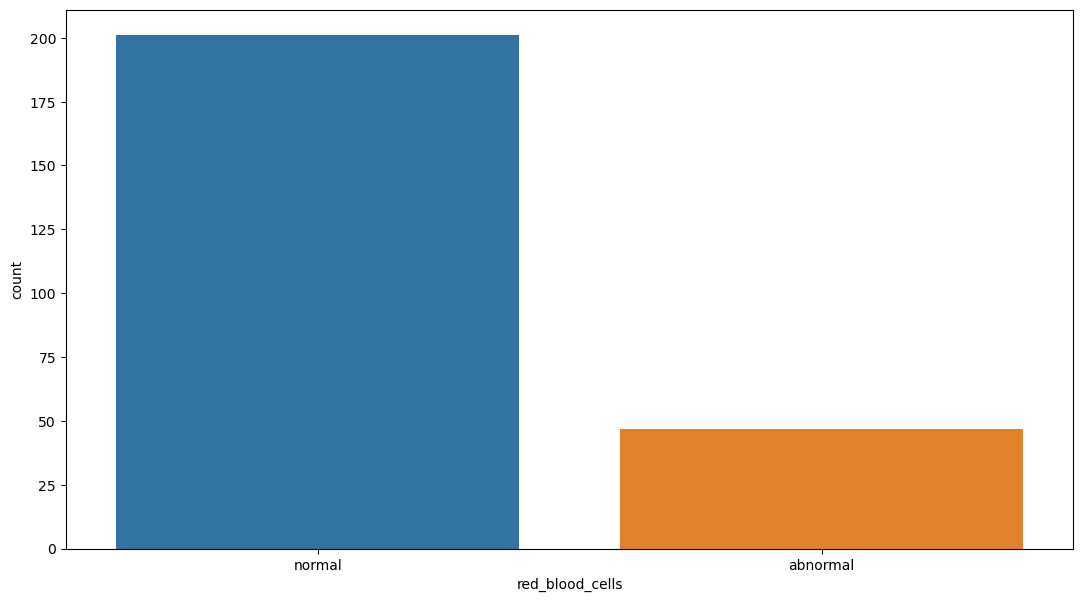

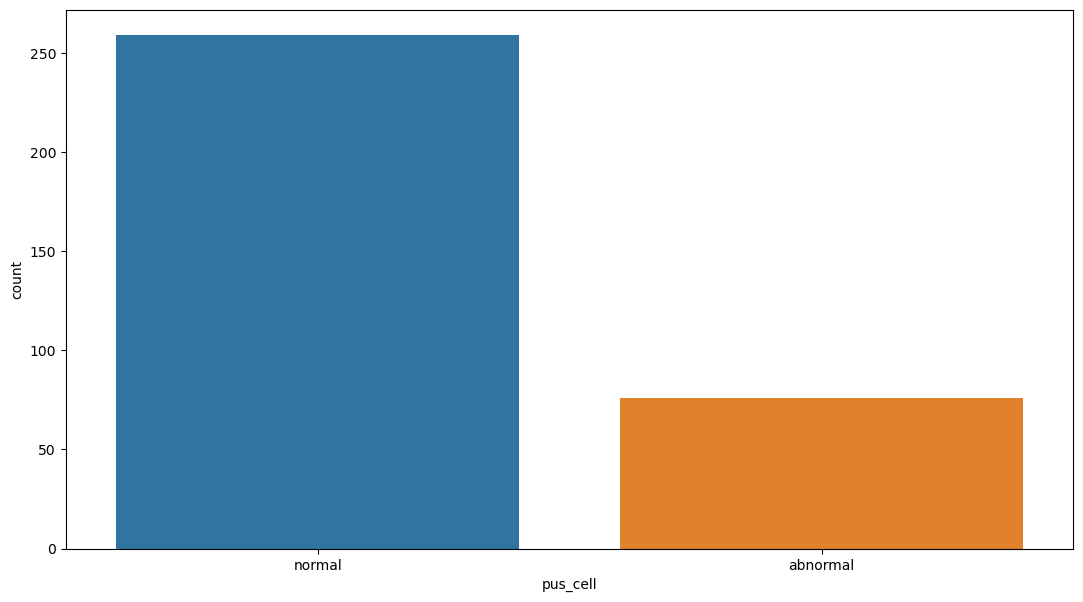

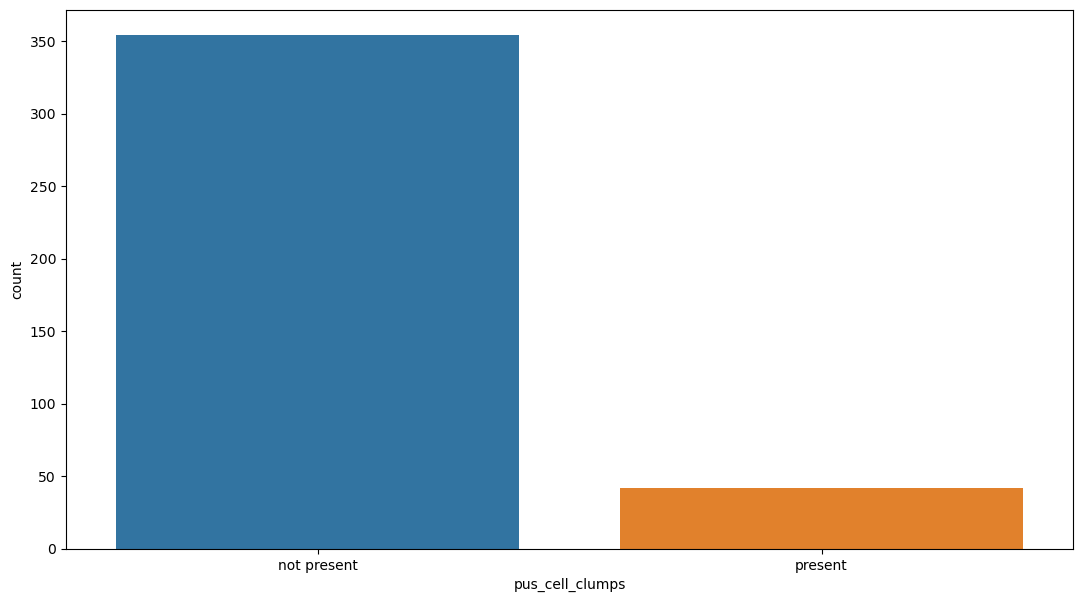

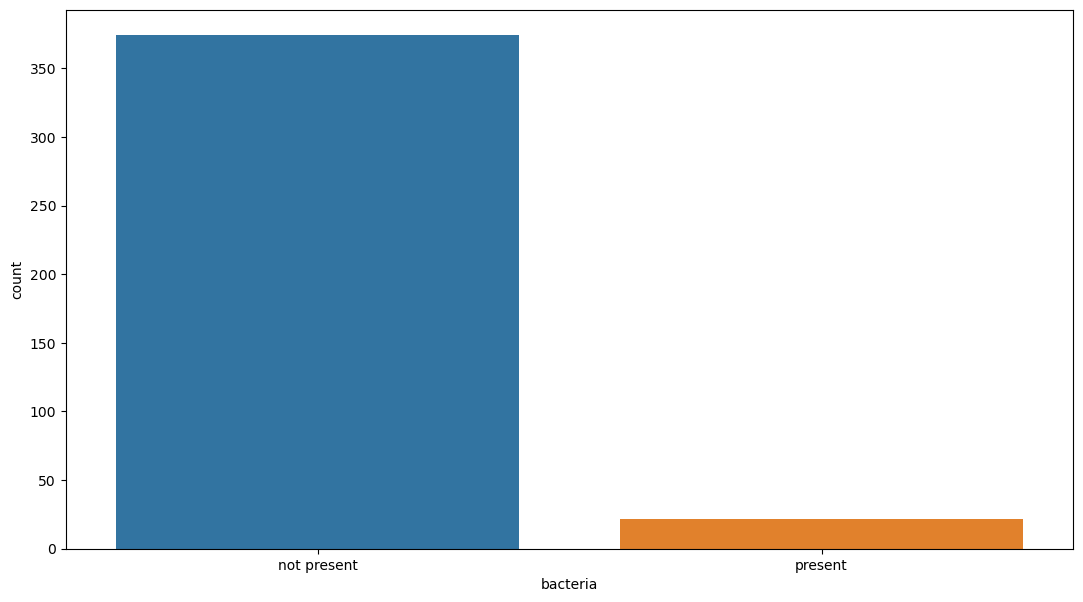

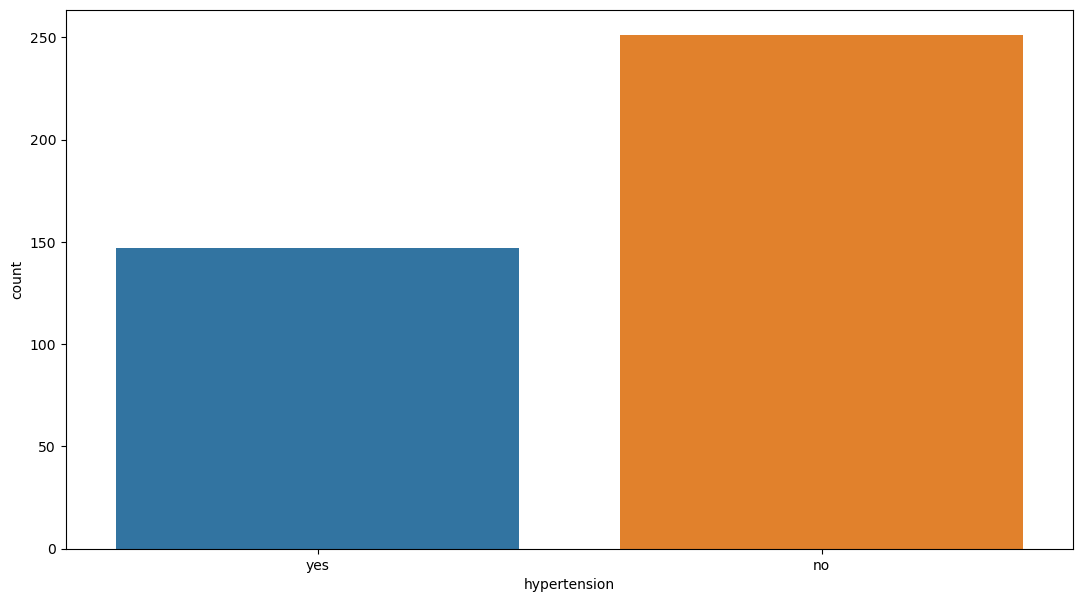

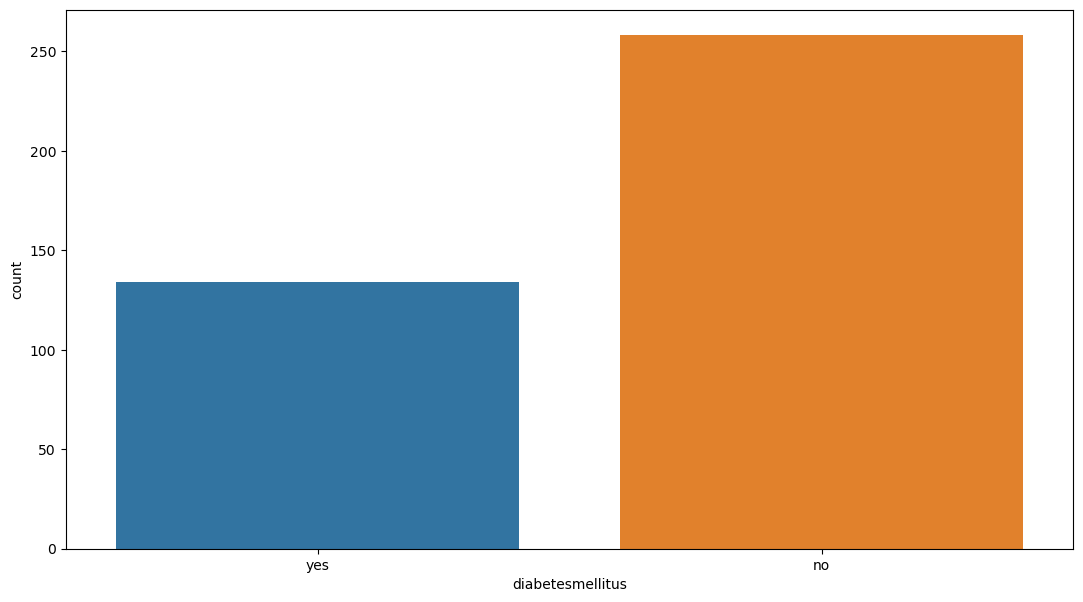

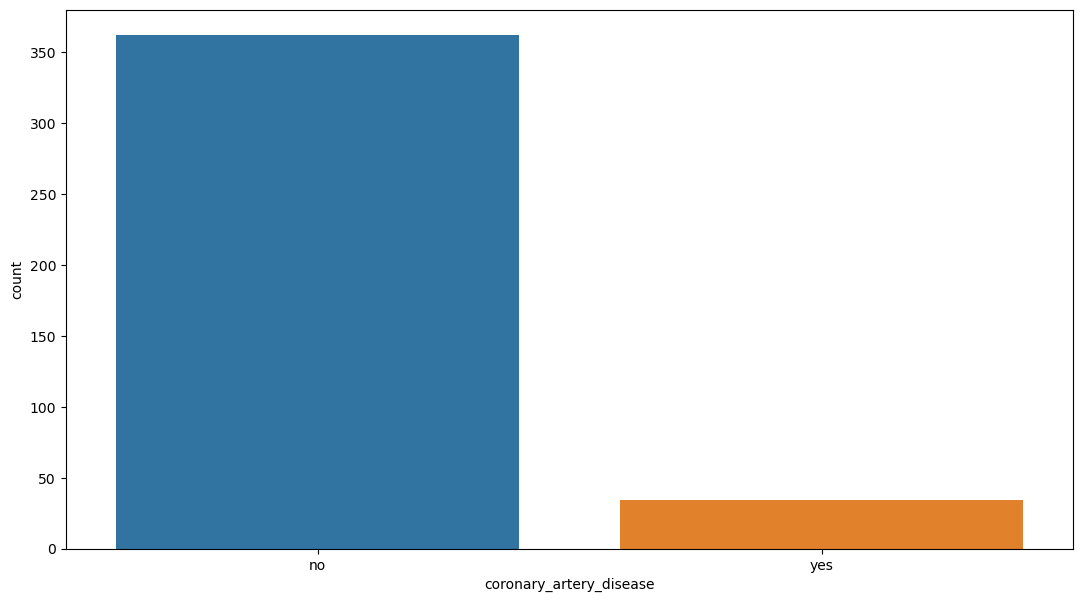

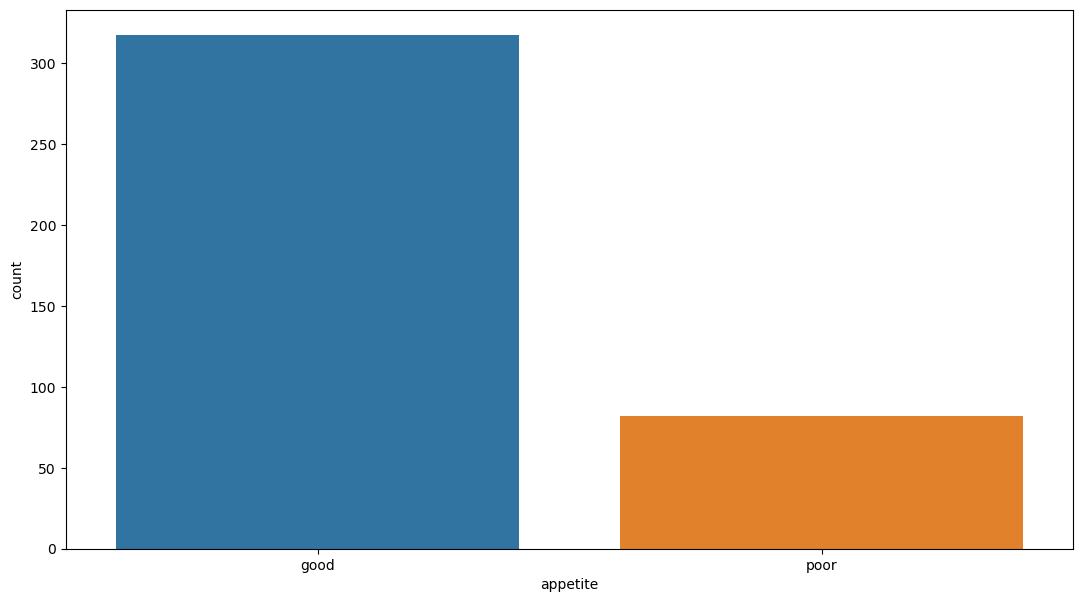

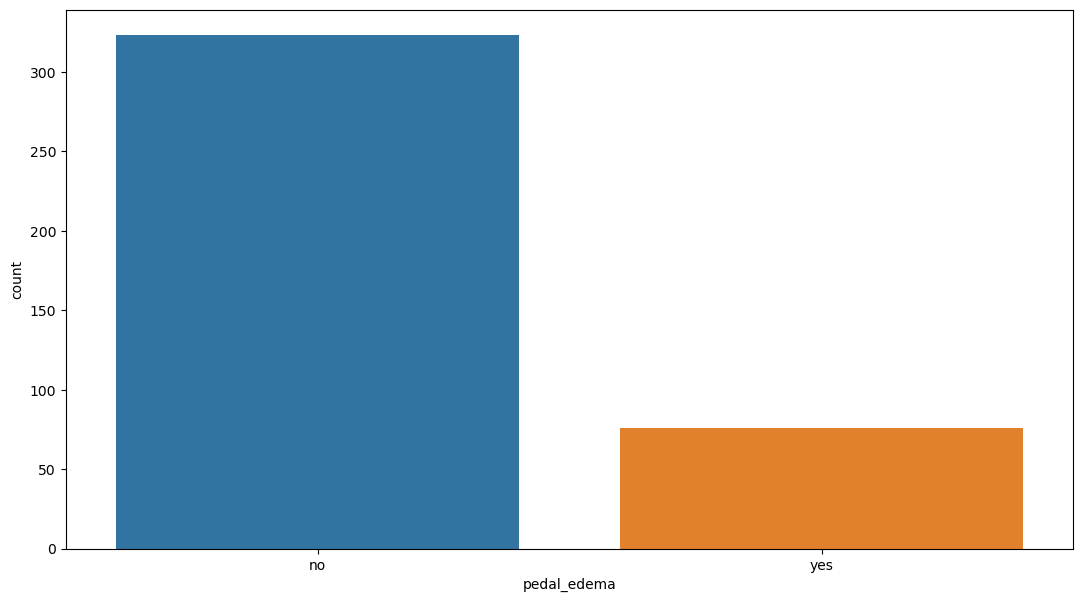

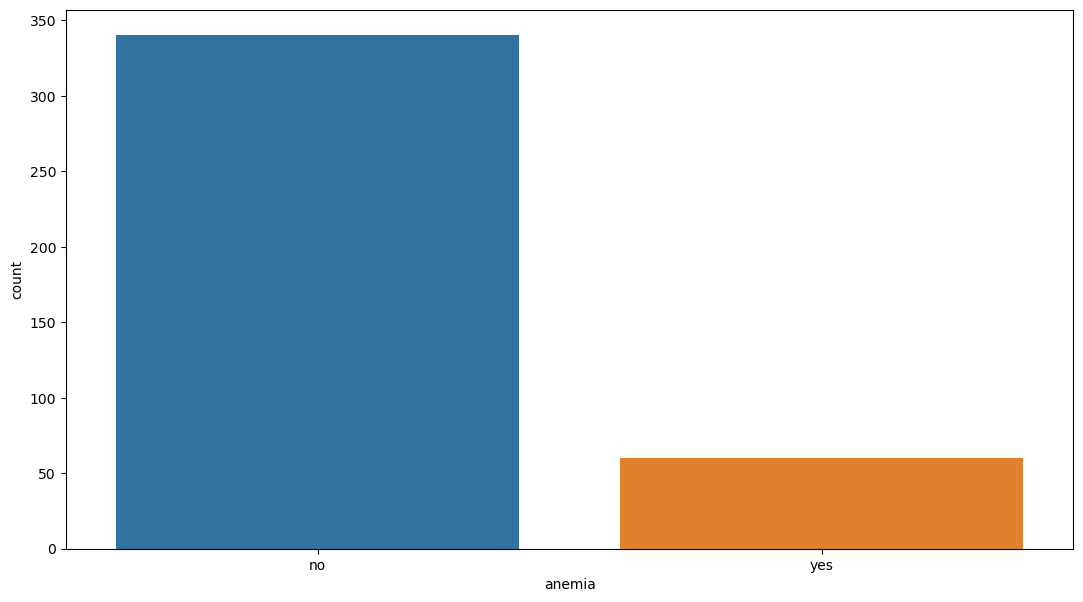

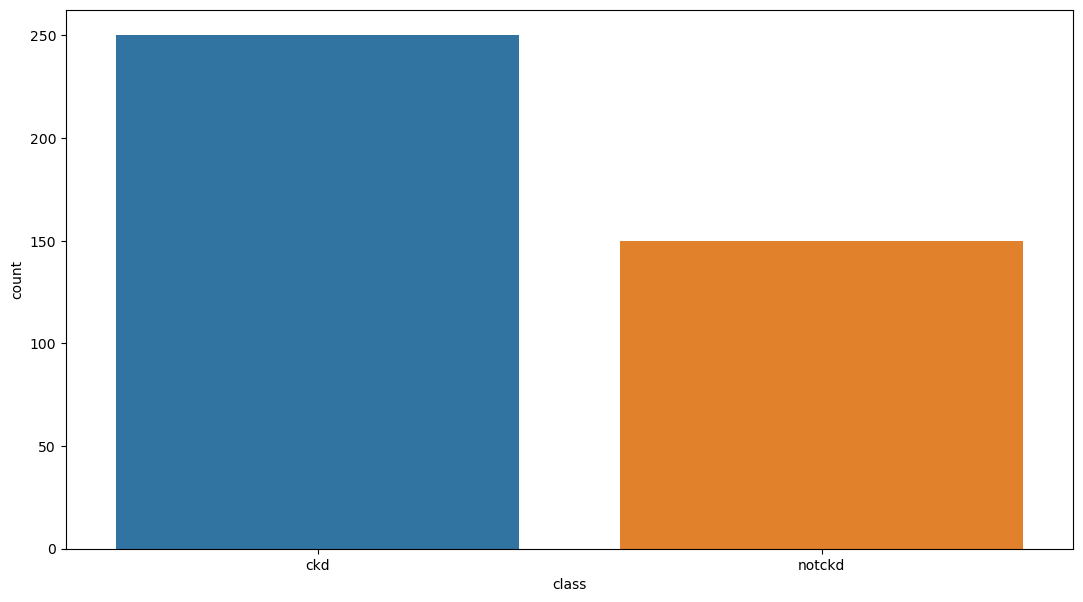

In [155]:
#univariate analysis

import matplotlib.pyplot as plt
import seaborn as sns
for col in data[['red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']]:
      fig= plt.subplots(1,1, figsize = (13,7))
      sns.countplot(x=data[col])


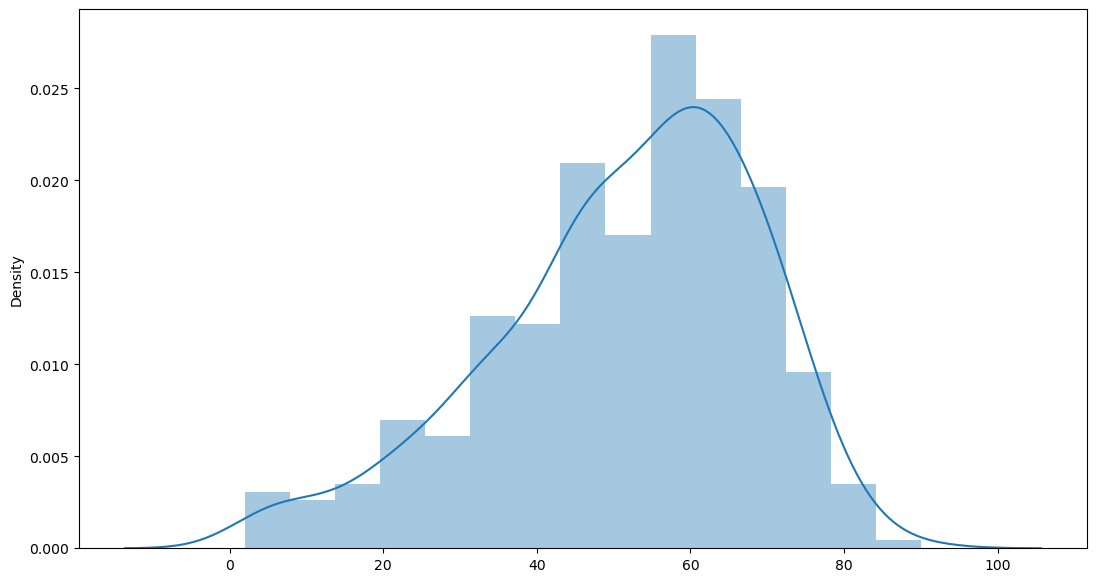

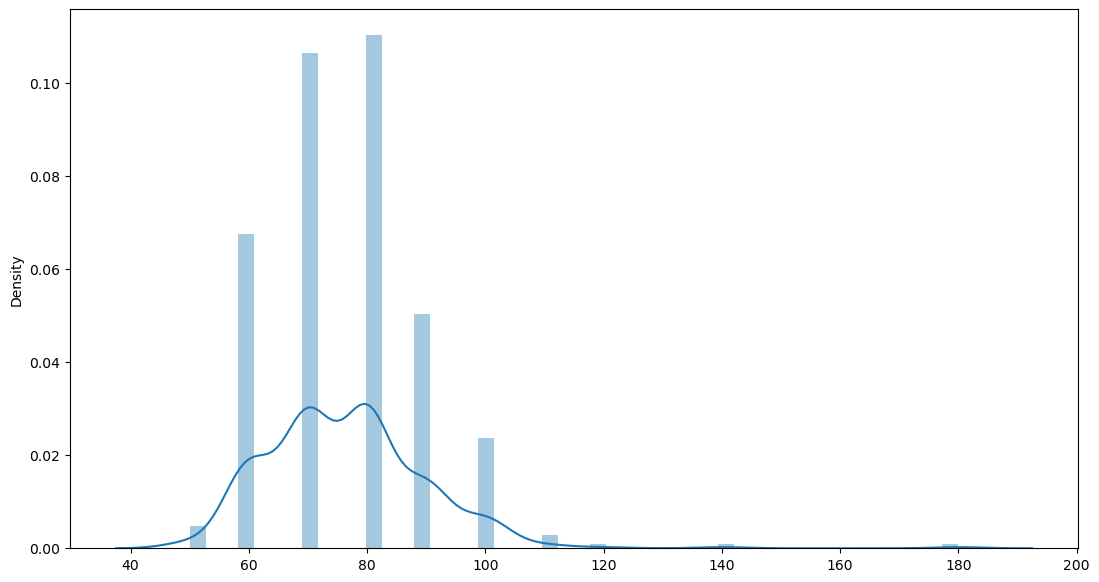

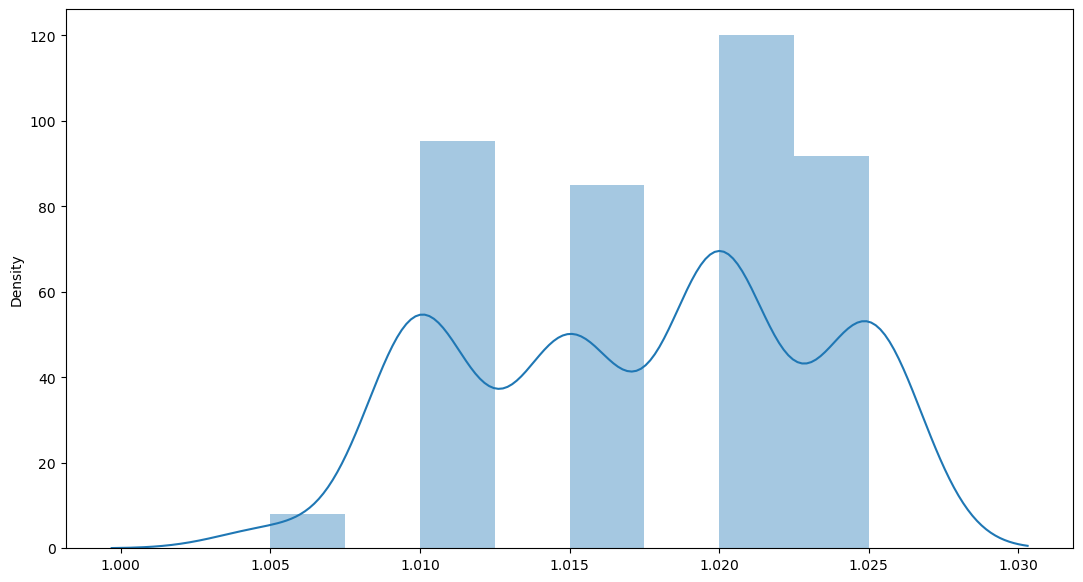

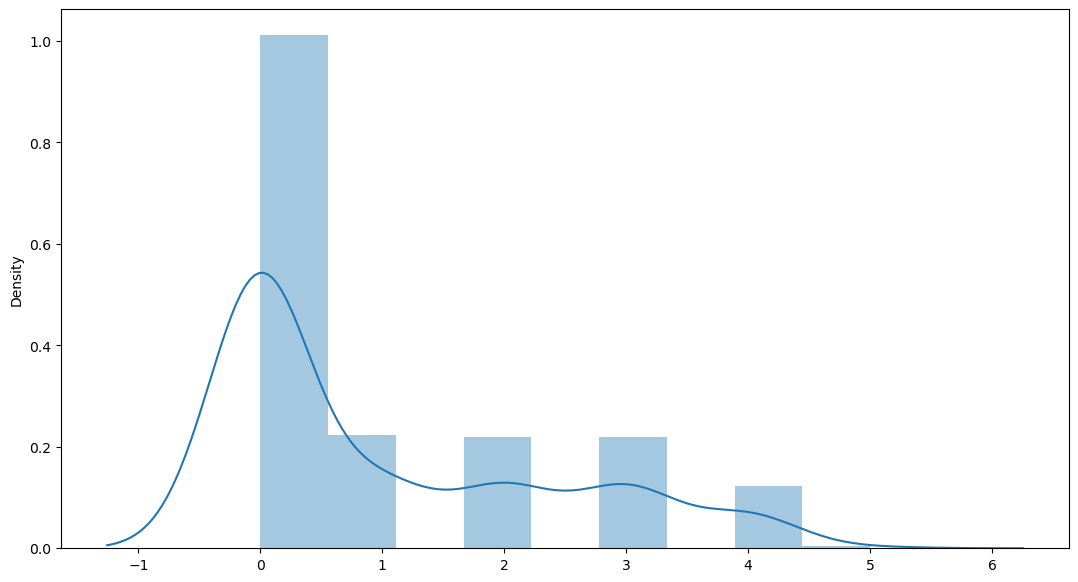

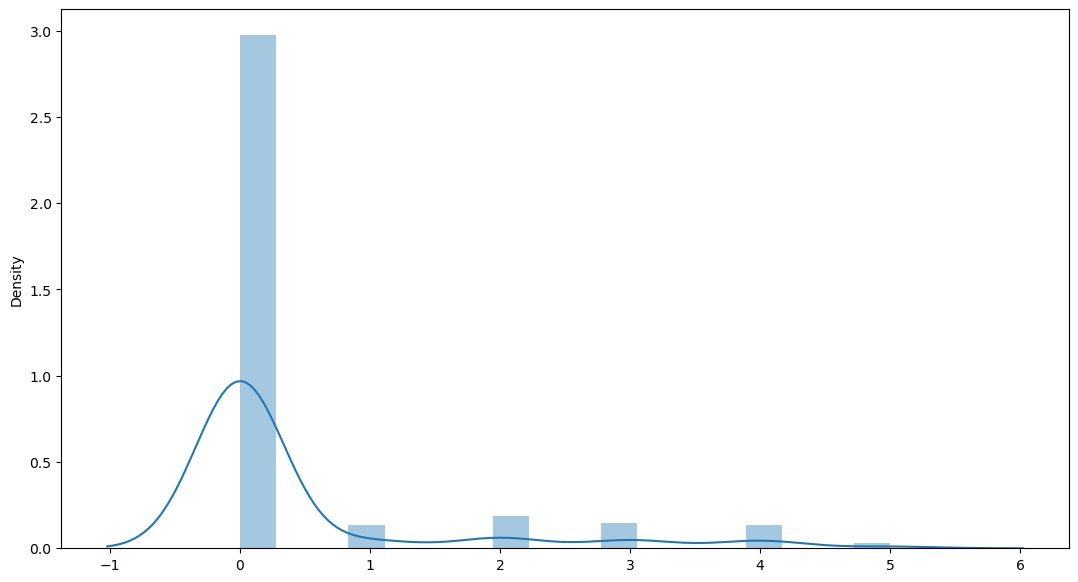

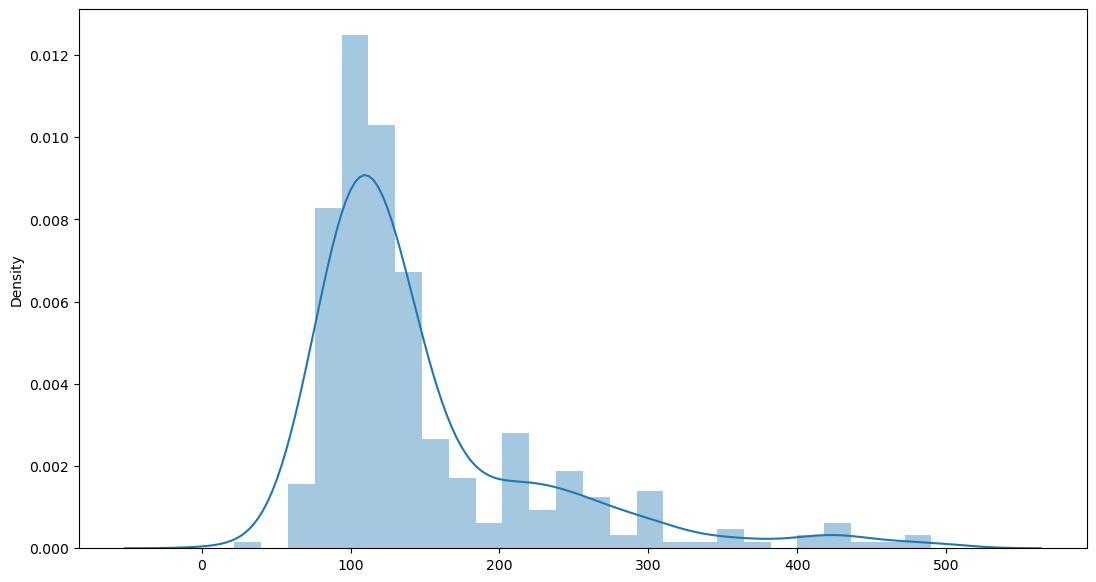

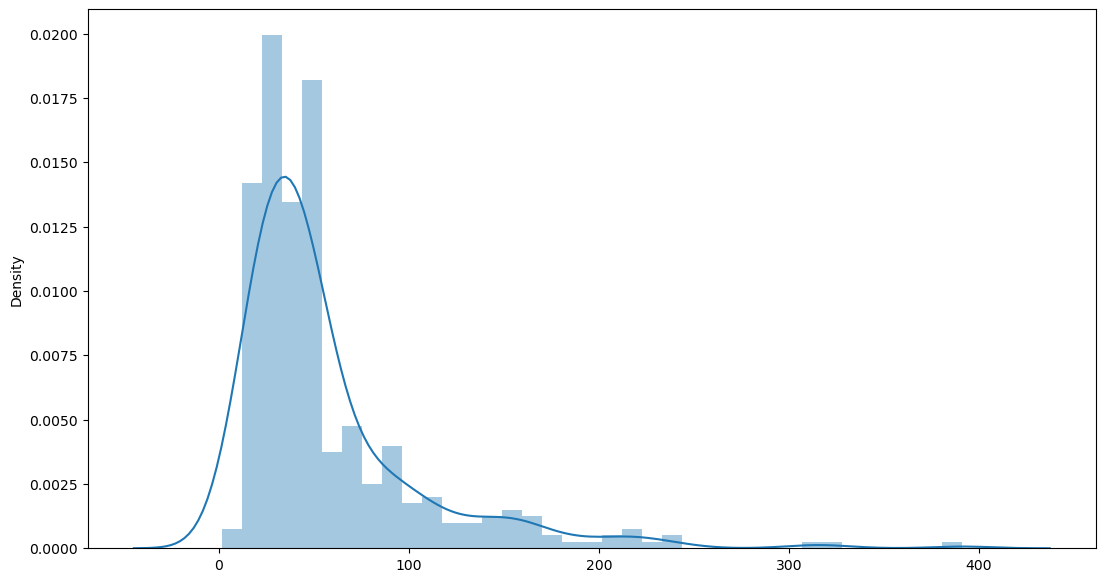

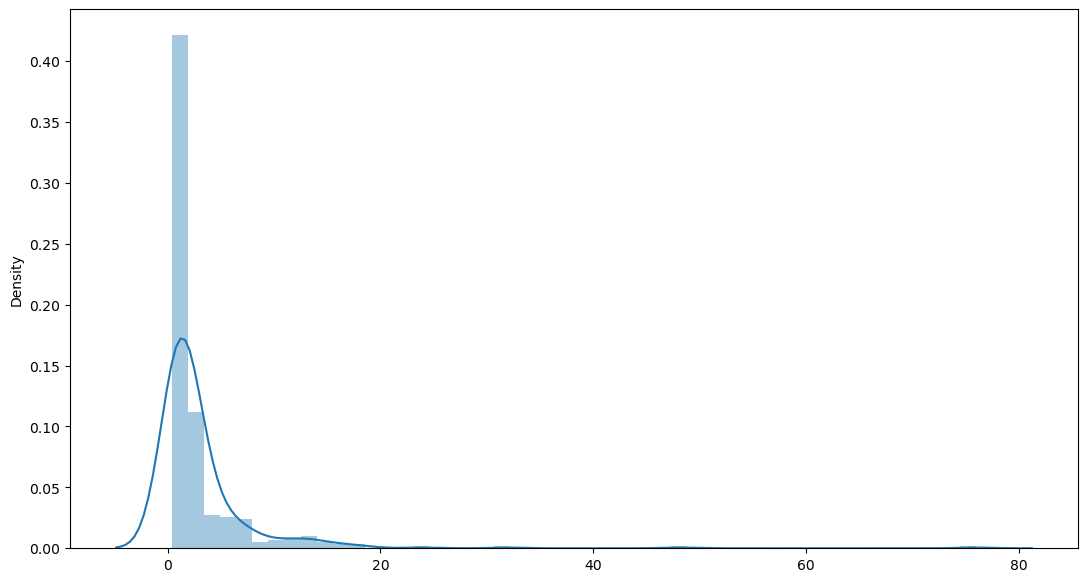

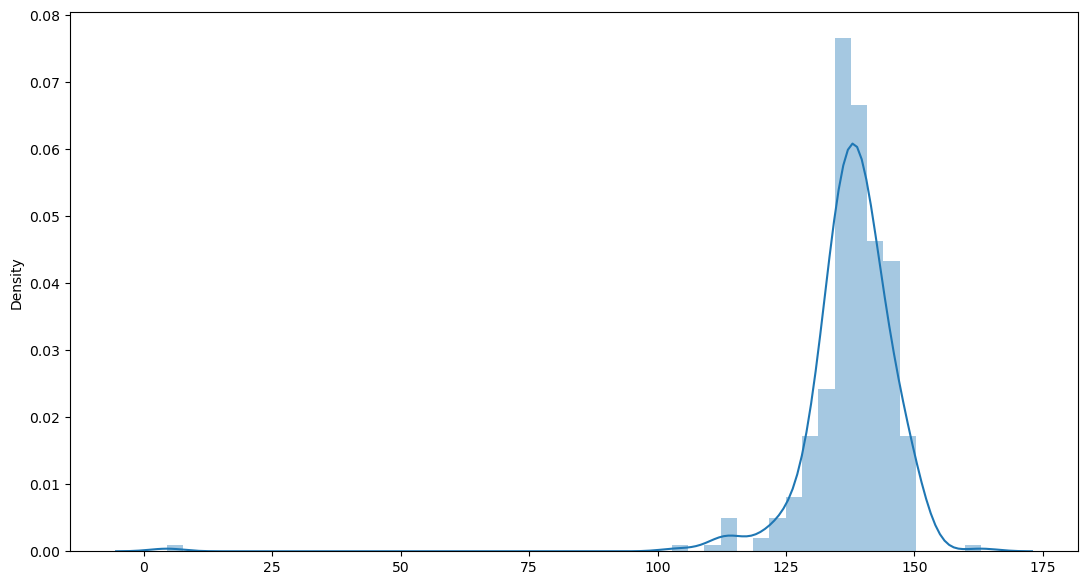

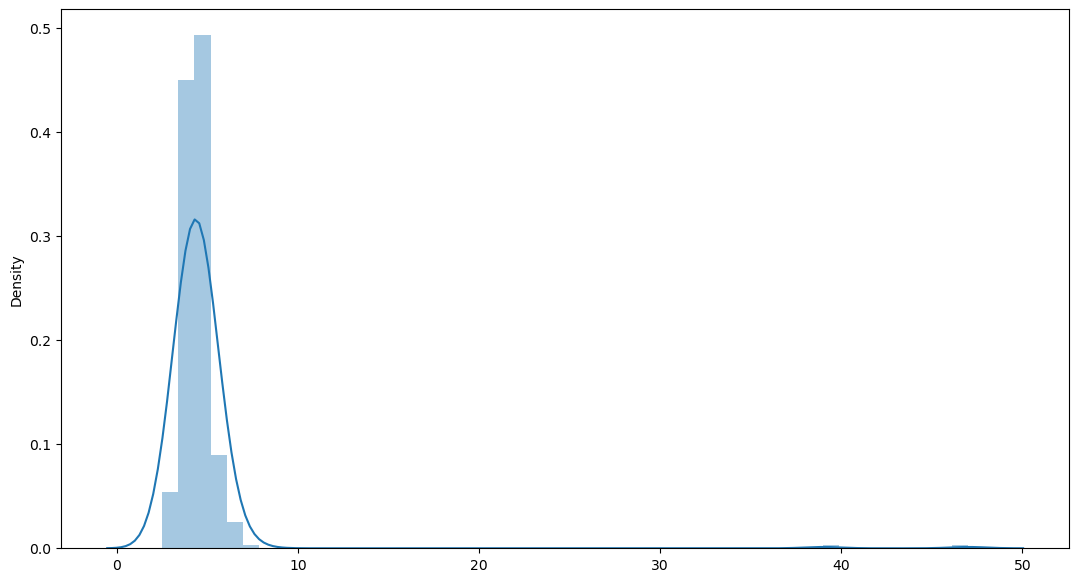

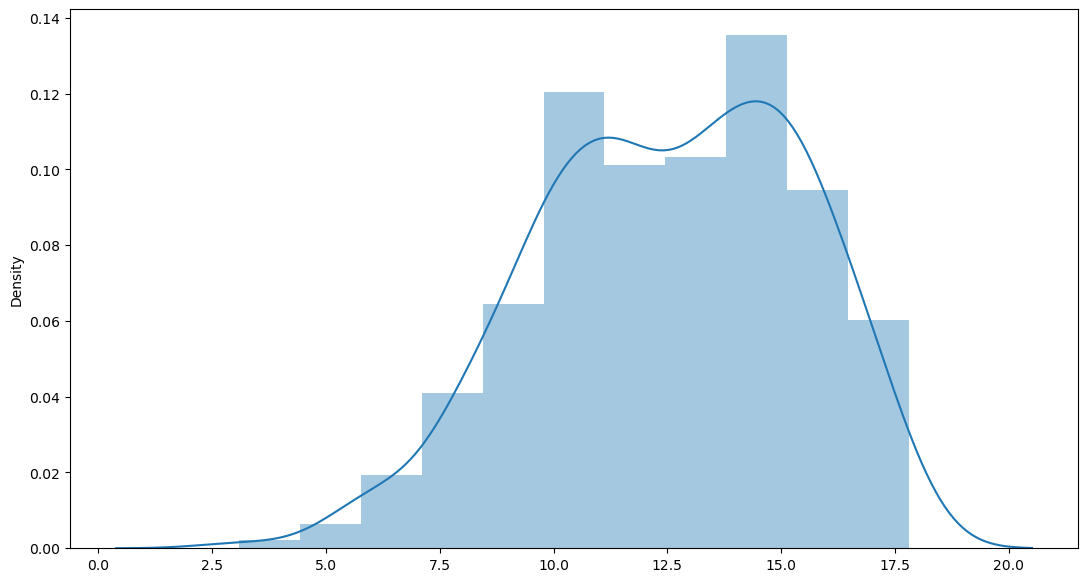

In [156]:
import matplotlib.pyplot as plt
for col in num_cols:
      fig= plt.subplots(1,1, figsize = (13,7))
      sns.distplot(x=data[col])

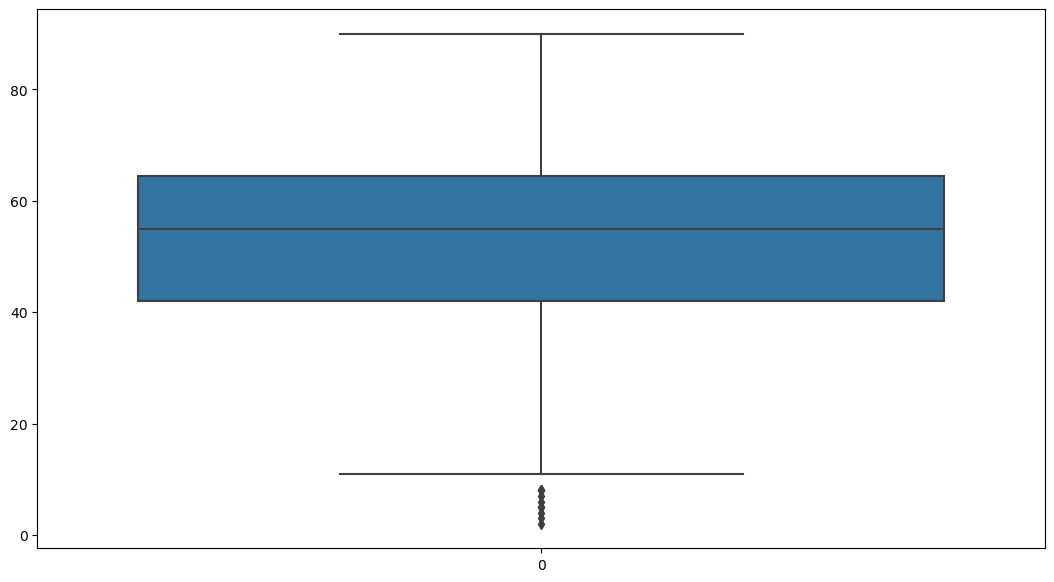

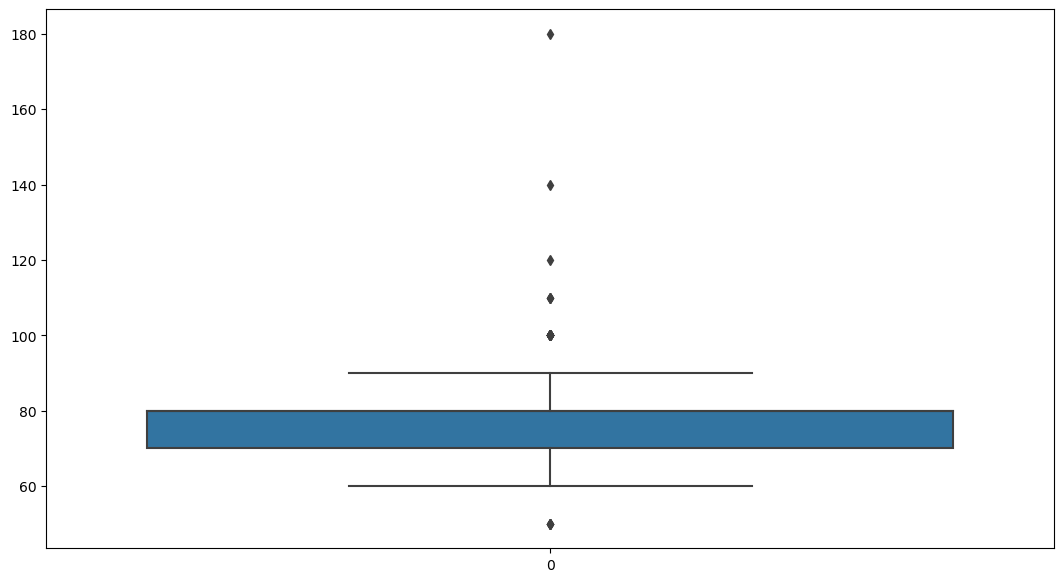

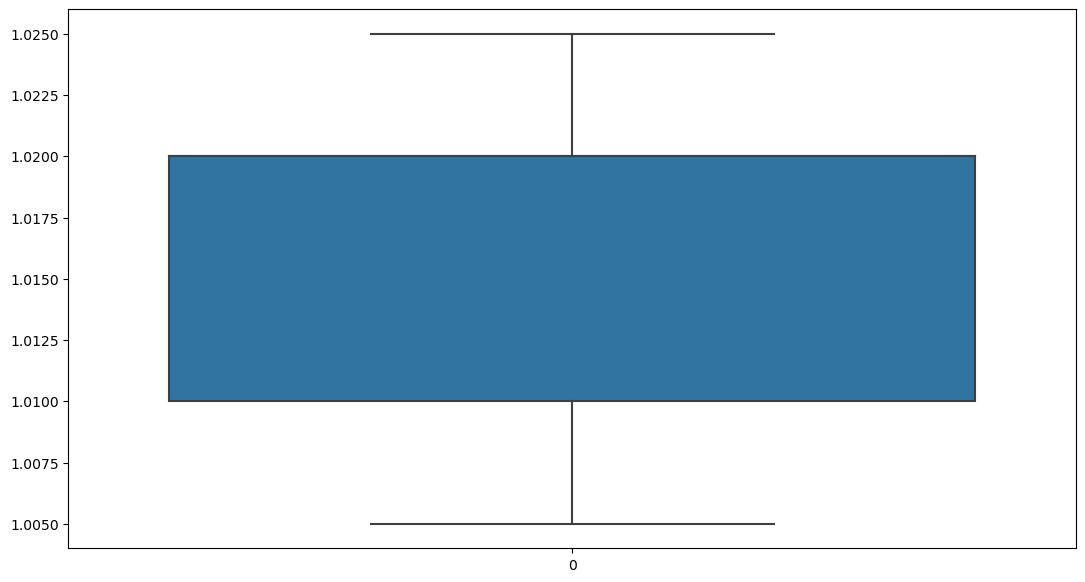

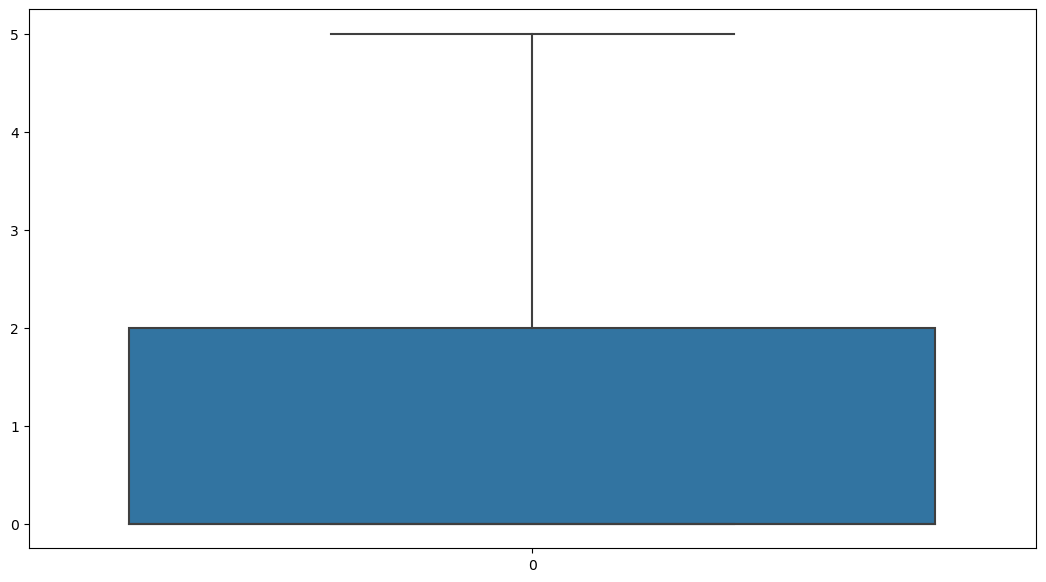

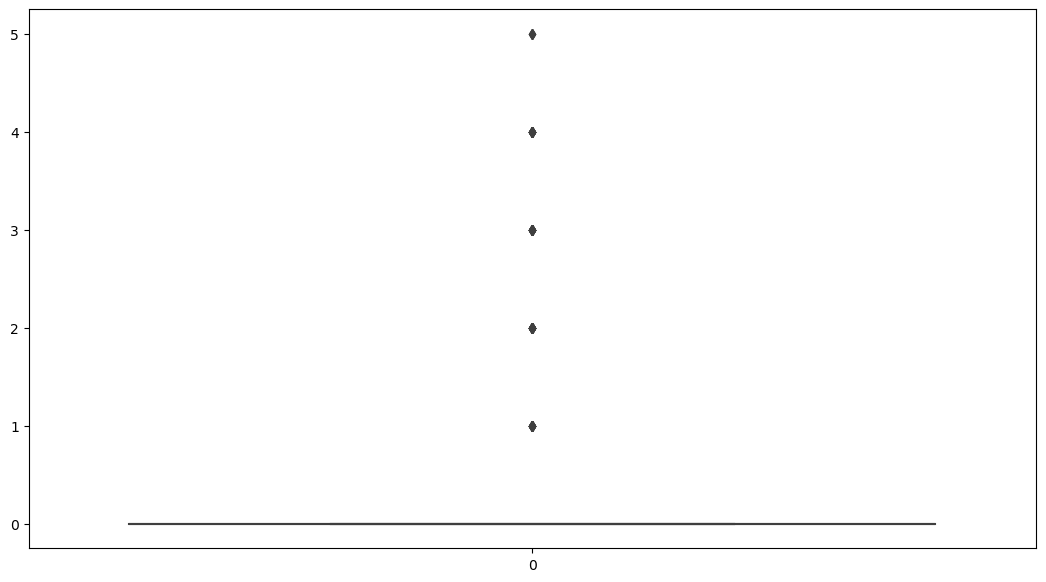

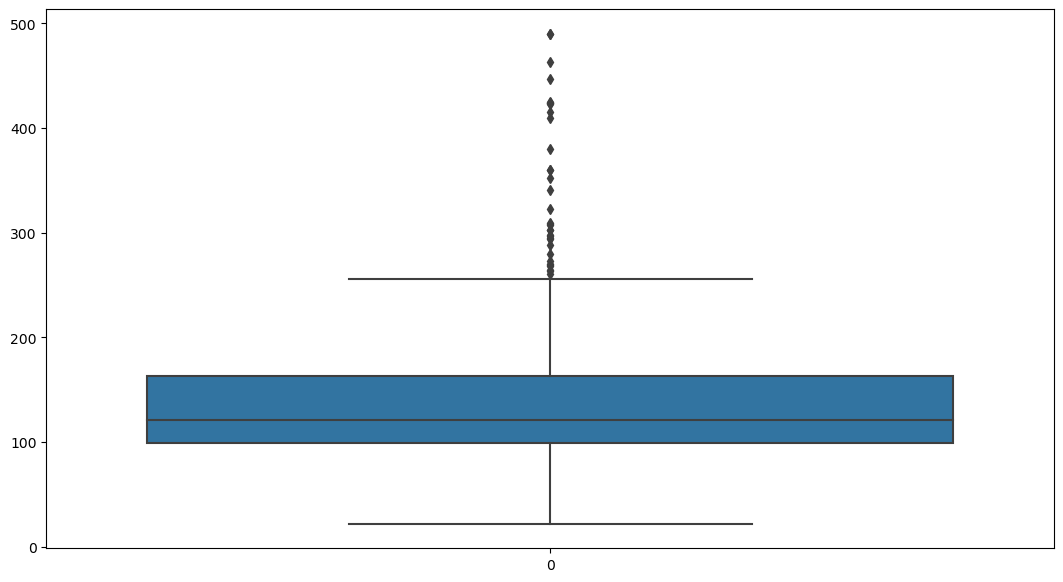

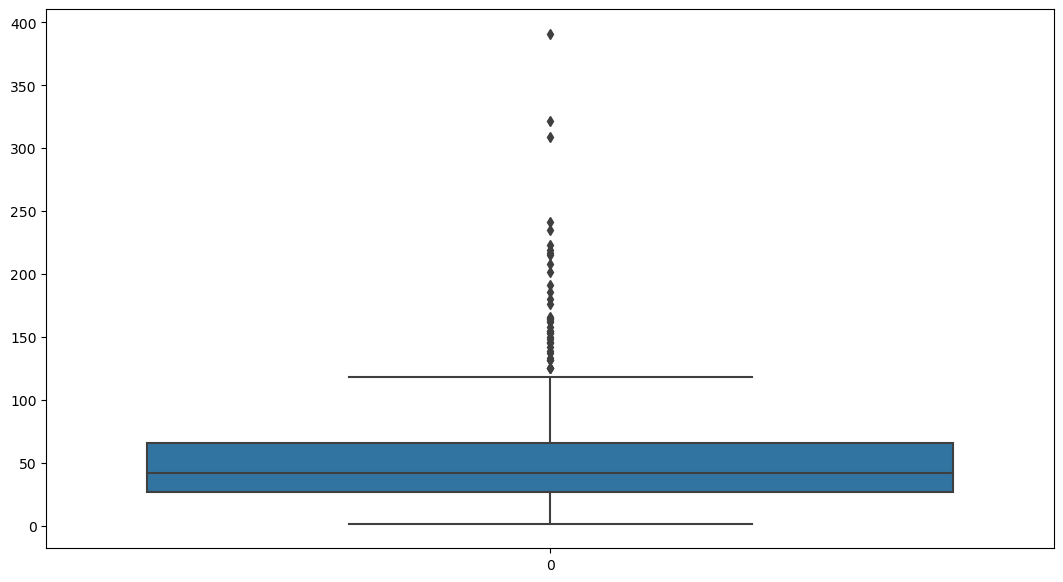

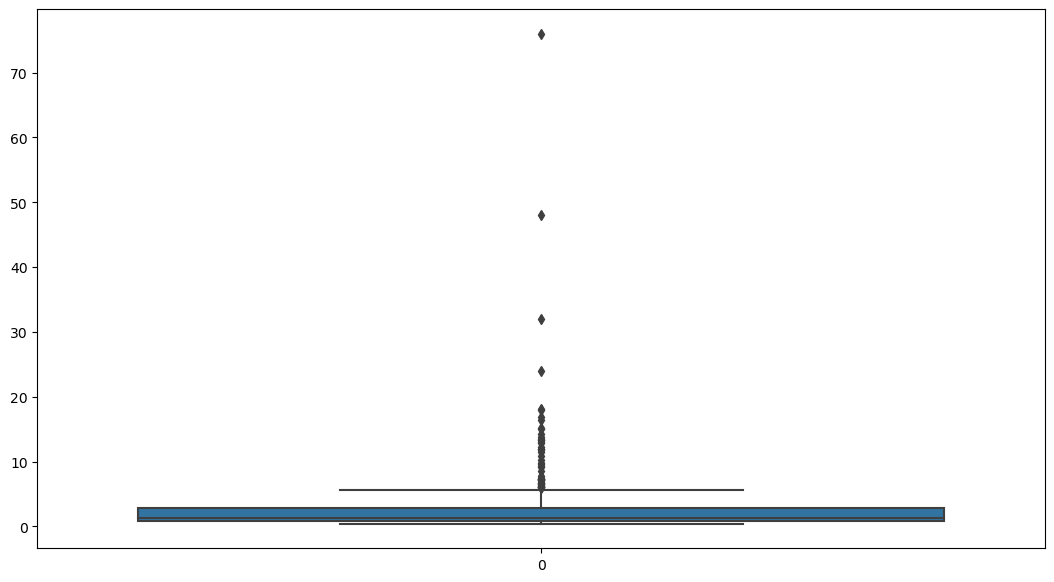

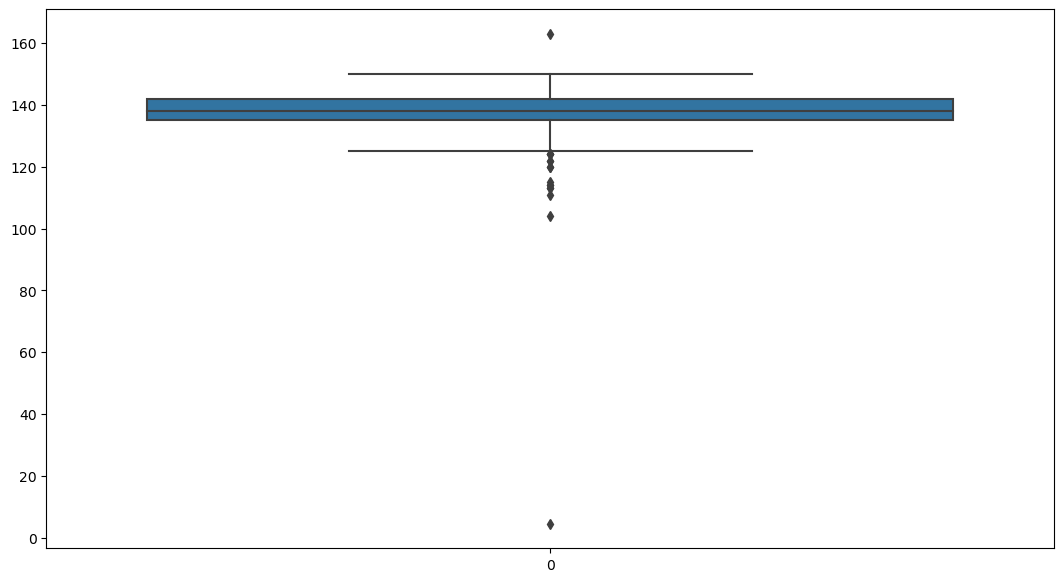

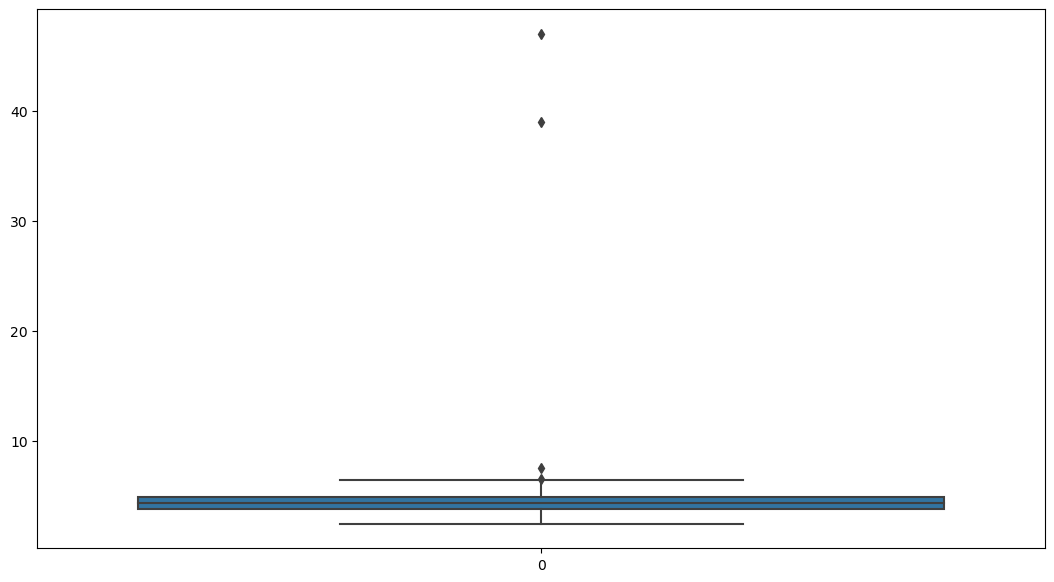

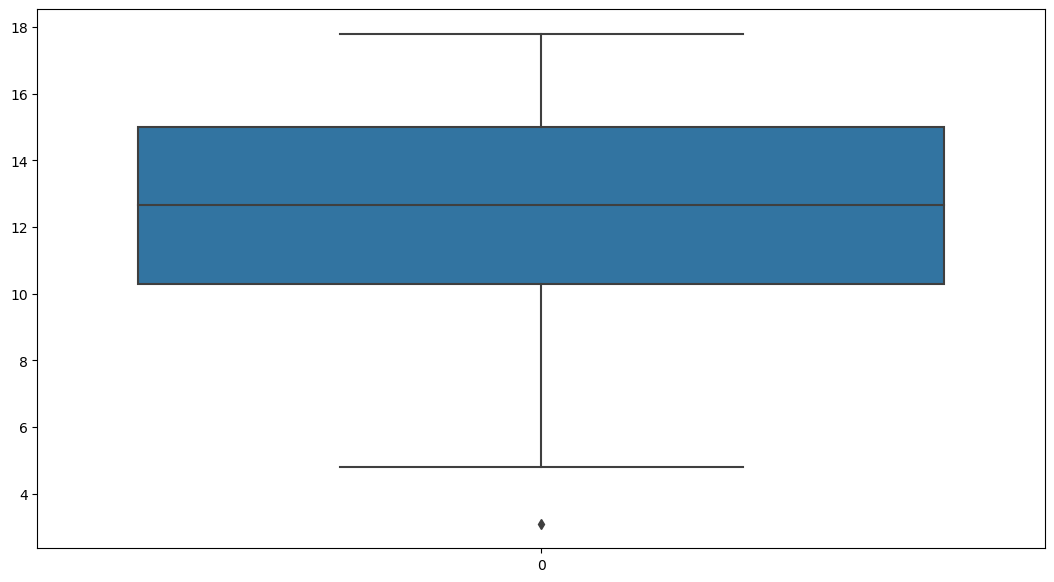

In [157]:
# outlier detection
# detecting outliers if is it present through boxplot

import matplotlib.pyplot as plt
for col in num_cols:
  fig= plt.subplots(1,1, figsize = (13,7))
  sns.boxplot(data[col], orient = 'v')
 

In [159]:
#bivariate analysis
#sns.lineplot(data[data['age'],'blood_pressure'])

In [160]:
#sns.scatterplot(data['age'],data['blood glucose random'],hue=data["class"])

In [162]:
#sns.scatterplot(data['blood_pressure'],data['blood glucose random'],hue=data["class"])

<AxesSubplot:>

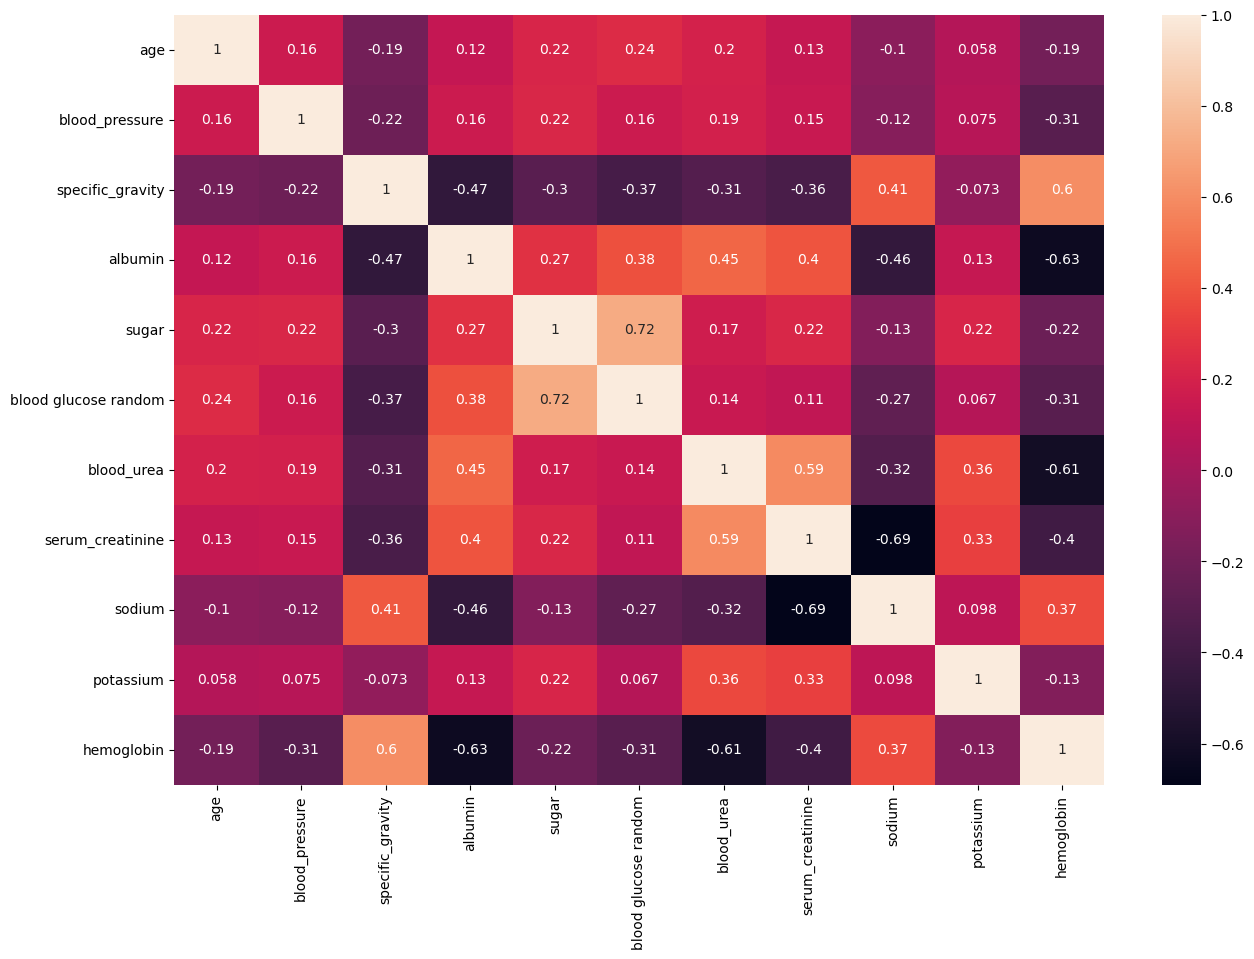

In [163]:
#multivariate analysis
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True,ax=ax) #there is not multicolinearity

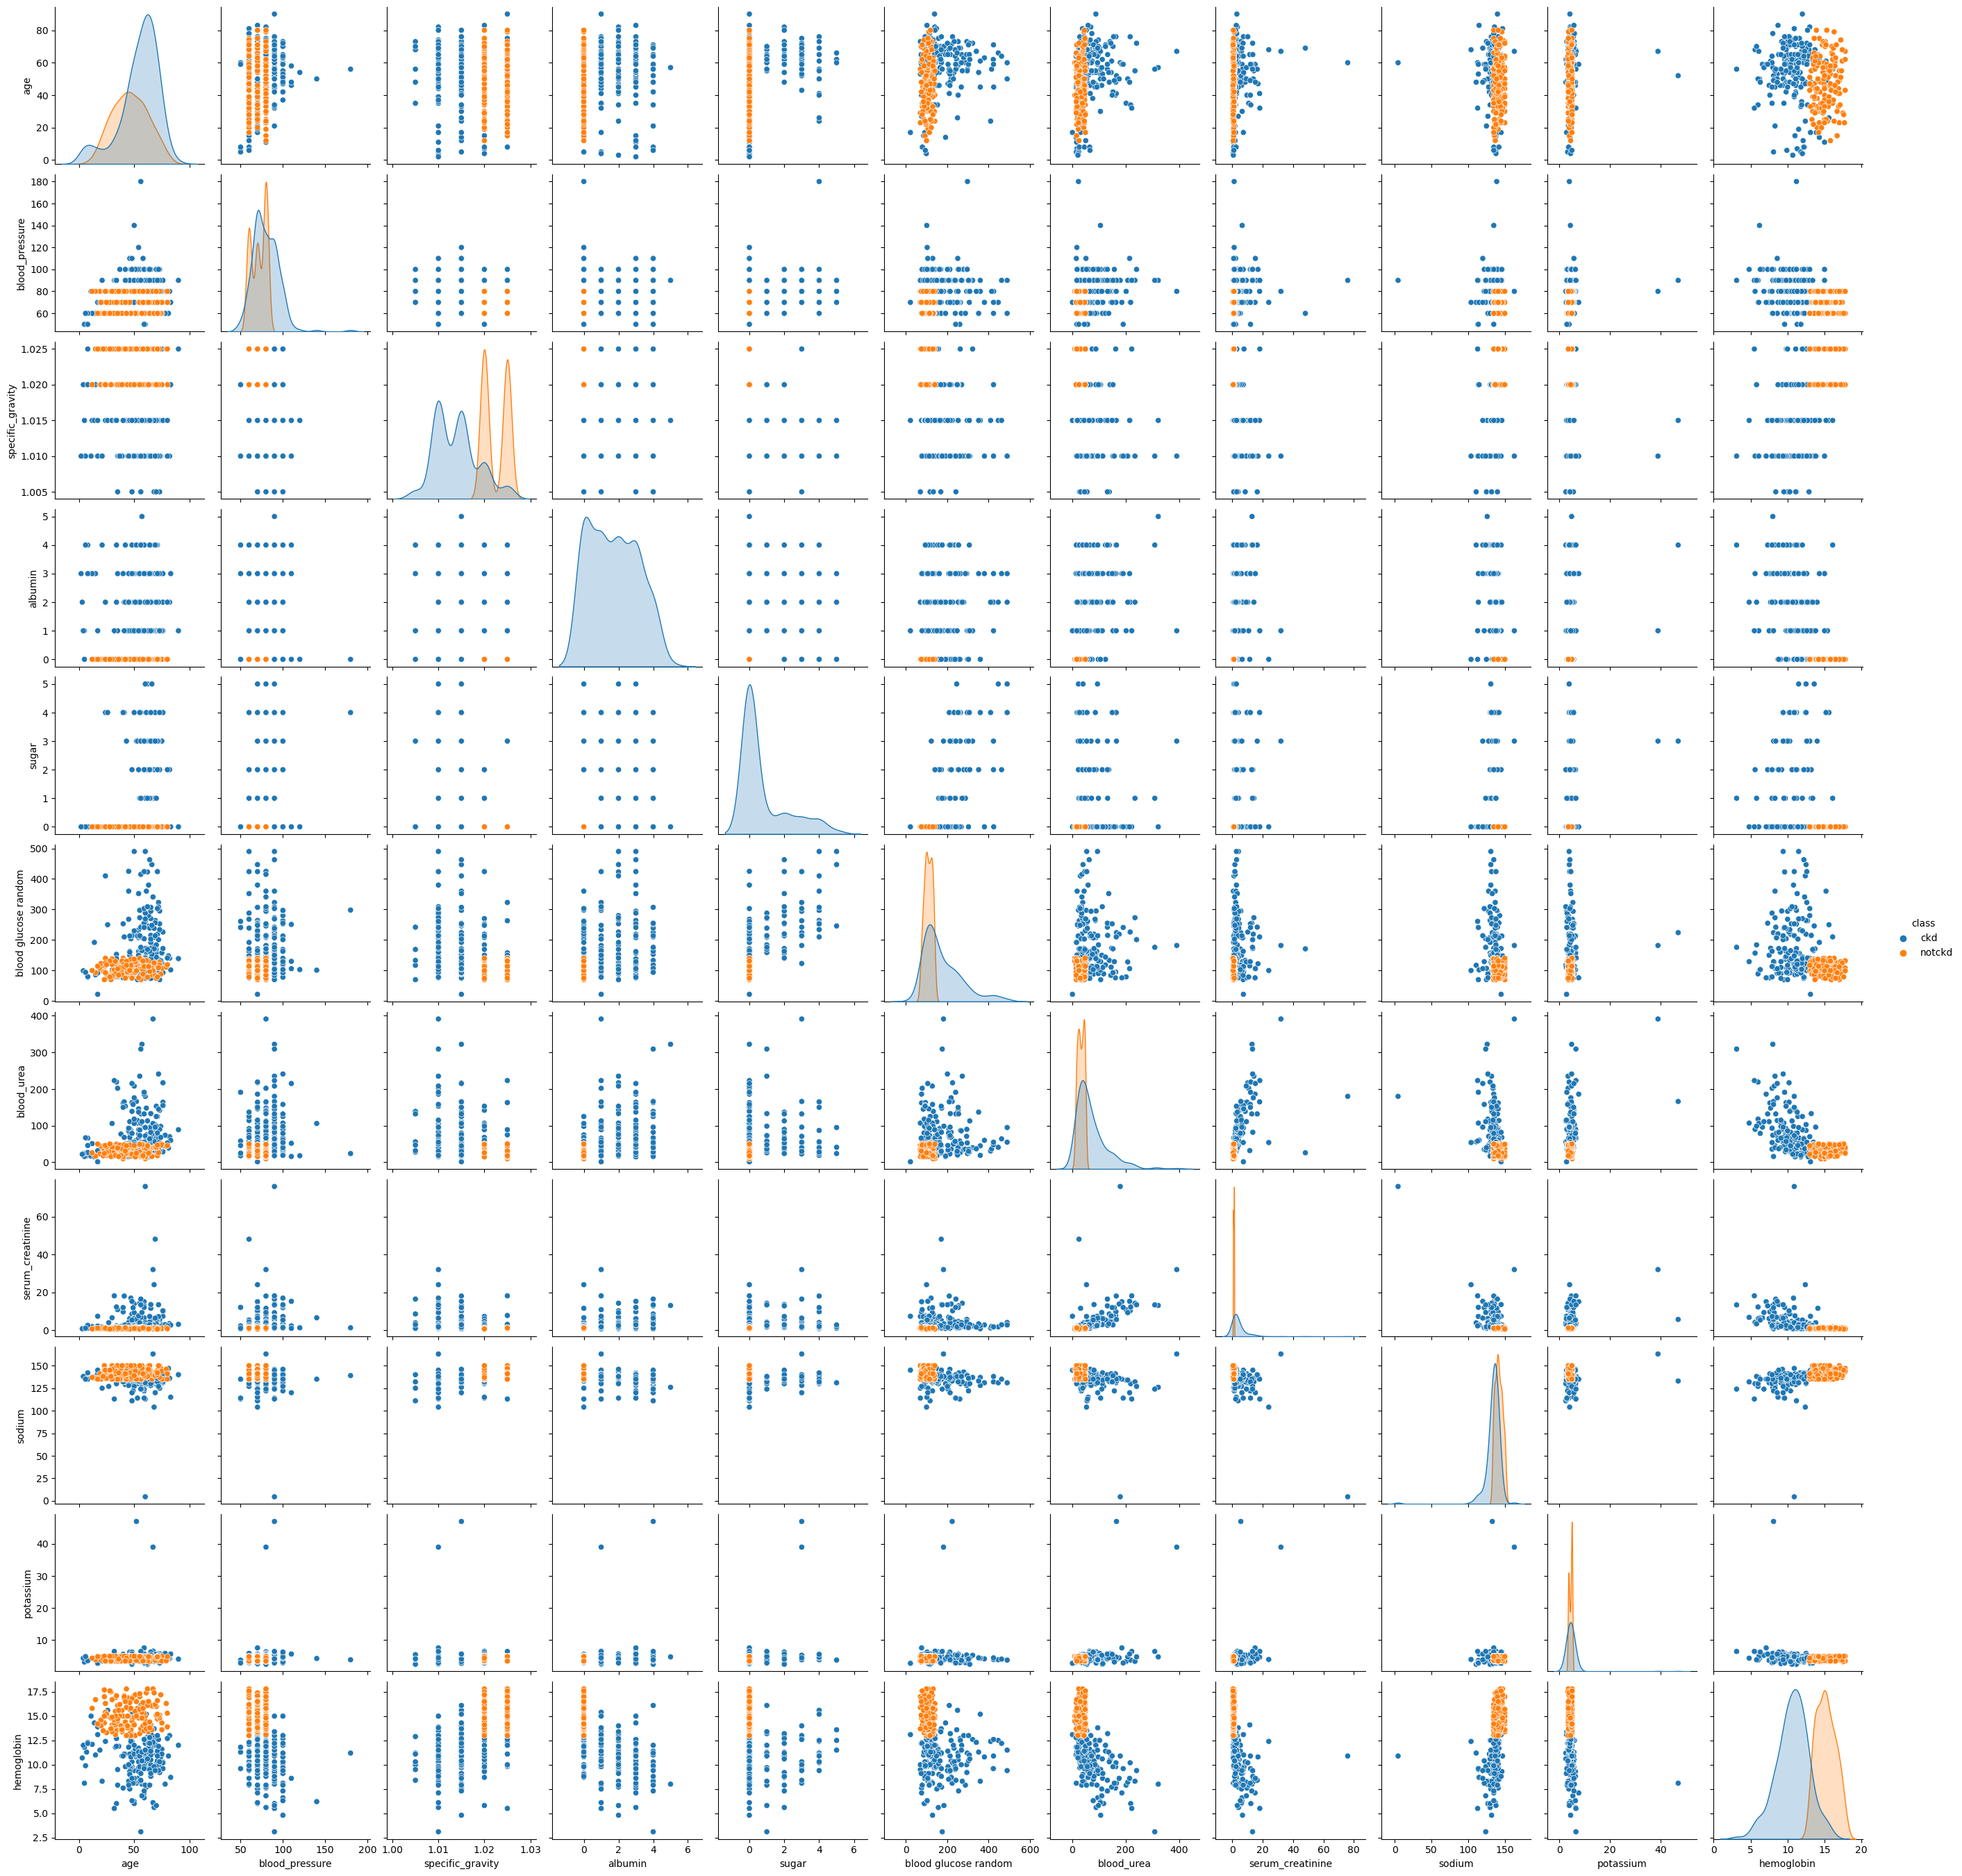

In [164]:
sns.pairplot(data,hue='class')

In [165]:
#replacing the outliers with IQR median method

def removeOutlier(cols):
    q1=data[cols].quantile(0.25)
    q3=data[cols].quantile(0.75)
    iqr=q3-q1
    upperlimit=q3+1.5*iqr
    lowerlimit=q1-1.5*iqr
    data[cols]=np.where(data[cols]>upperlimit,data[cols].median(),data[cols])
    data[cols]=np.where(data[cols]<lowerlimit,data[cols].median(),data[cols])
    print('***************'+cols+'********************')
    print(q1,q3,iqr)
    

for cols in num_cols:
    removeOutlier(cols);

***************age********************
42.0 64.5 22.5
***************blood_pressure********************
70.0 80.0 10.0
***************specific_gravity********************
1.01 1.02 0.010000000000000009
***************albumin********************
0.0 2.0 2.0
***************sugar********************
0.0 0.0 0.0
***************blood glucose random********************
99.0 163.0 64.0
***************blood_urea********************
27.0 66.0 39.0
***************serum_creatinine********************
0.9 2.8 1.9
***************sodium********************
135.0 142.0 7.0
***************potassium********************
3.8 4.9 1.1000000000000005
***************hemoglobin********************
10.3 15.0 4.699999999999999


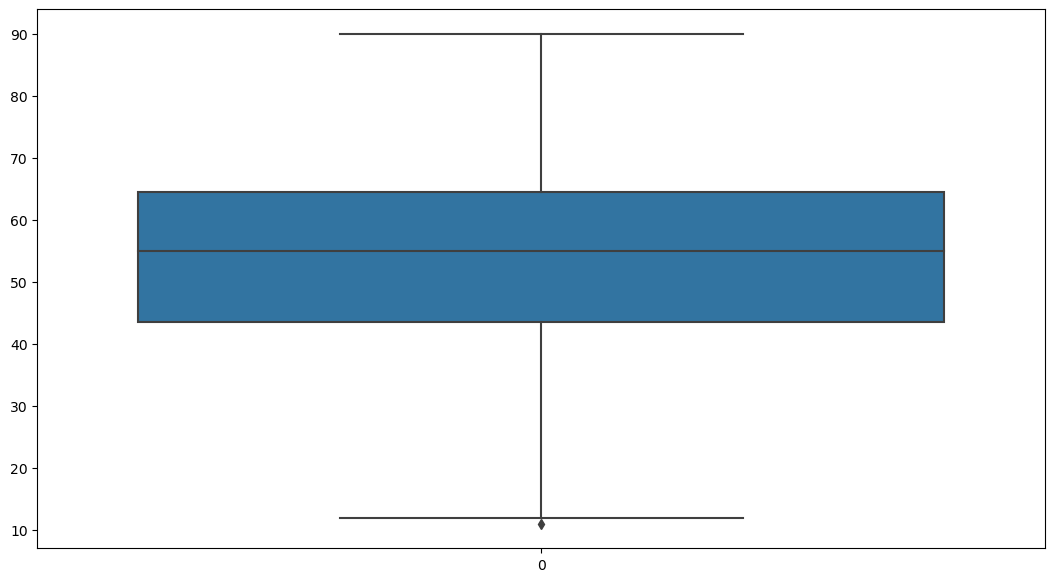

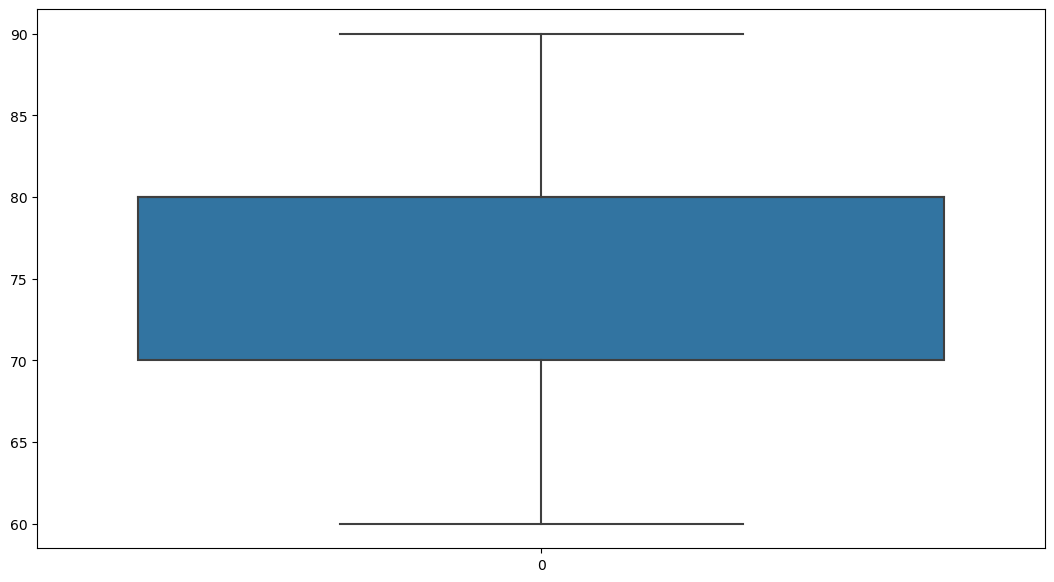

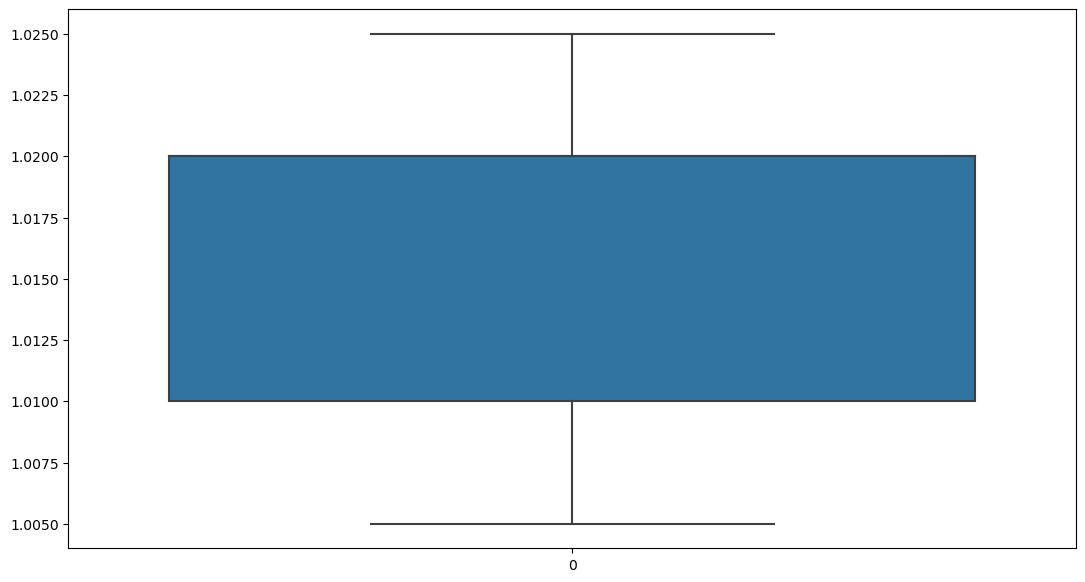

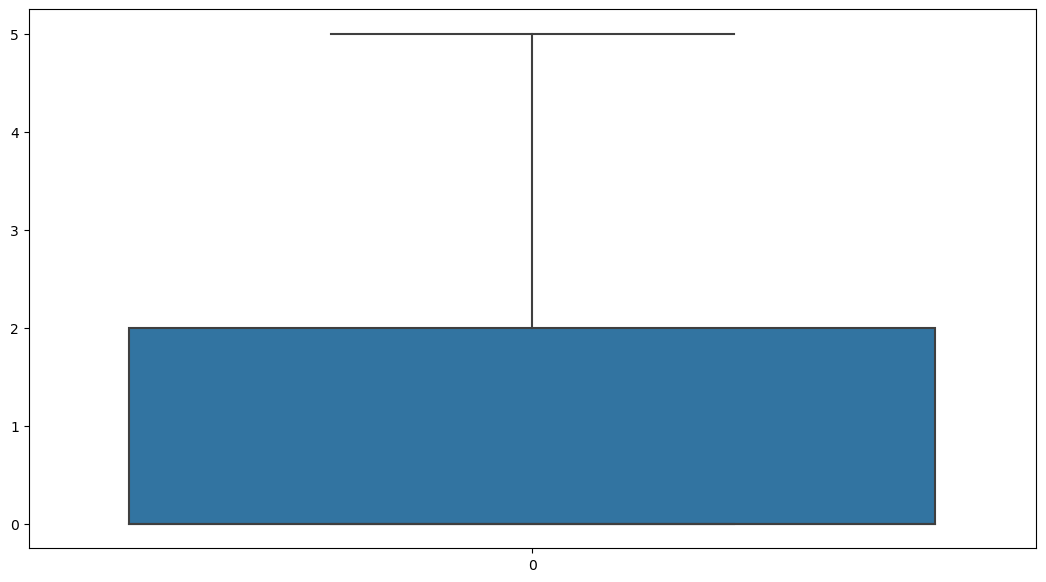

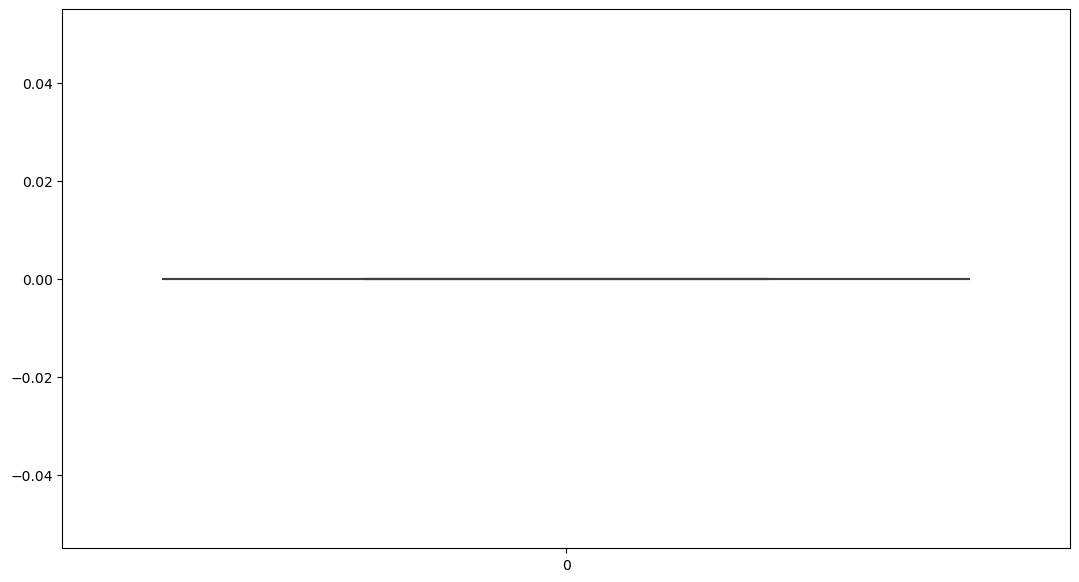

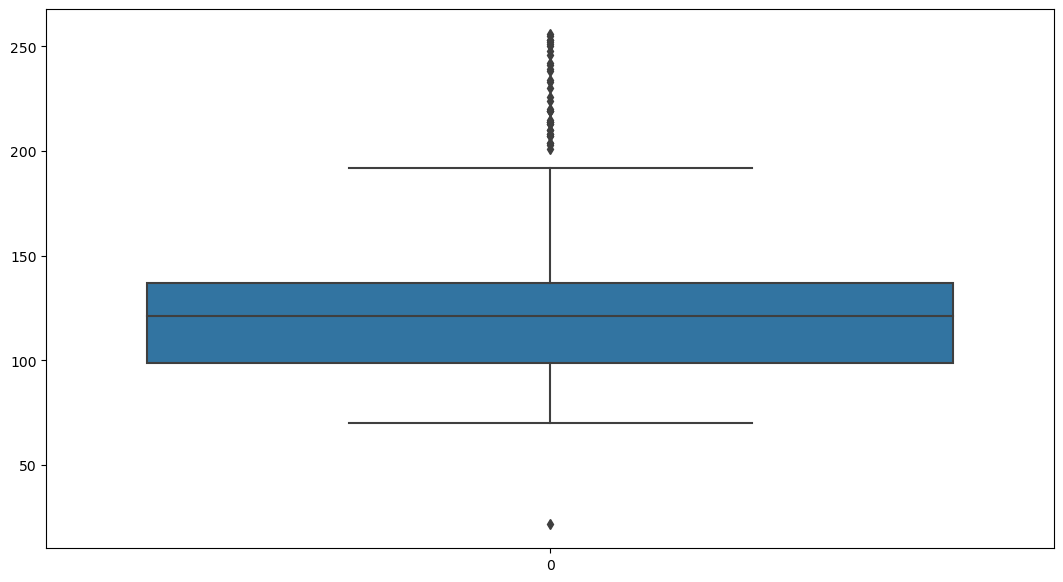

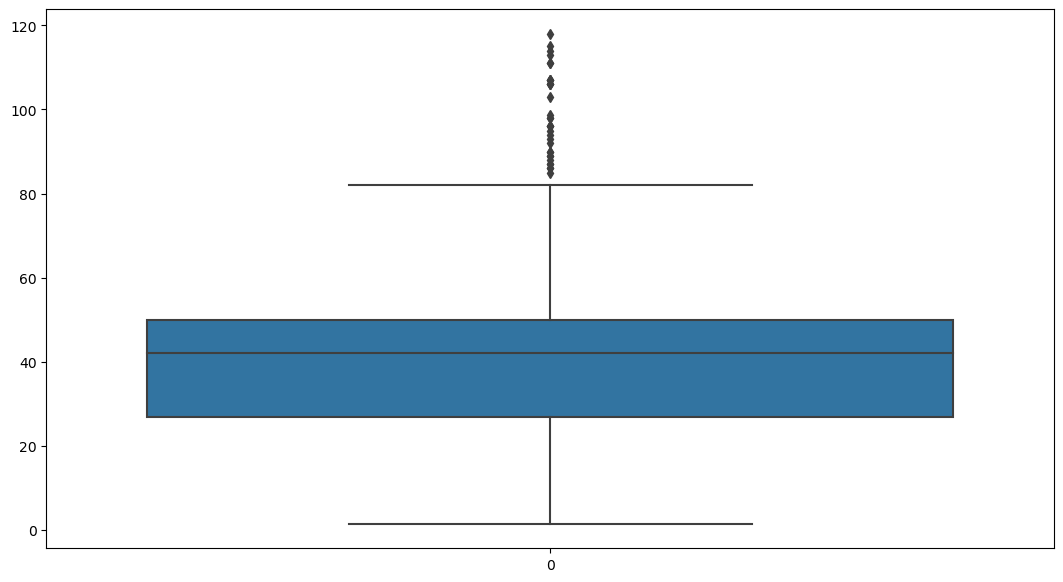

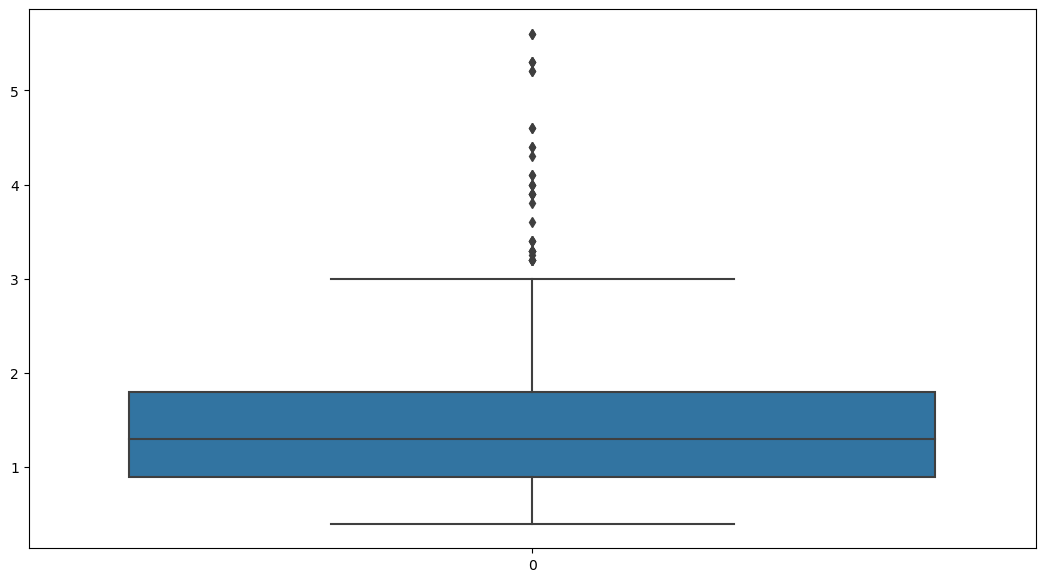

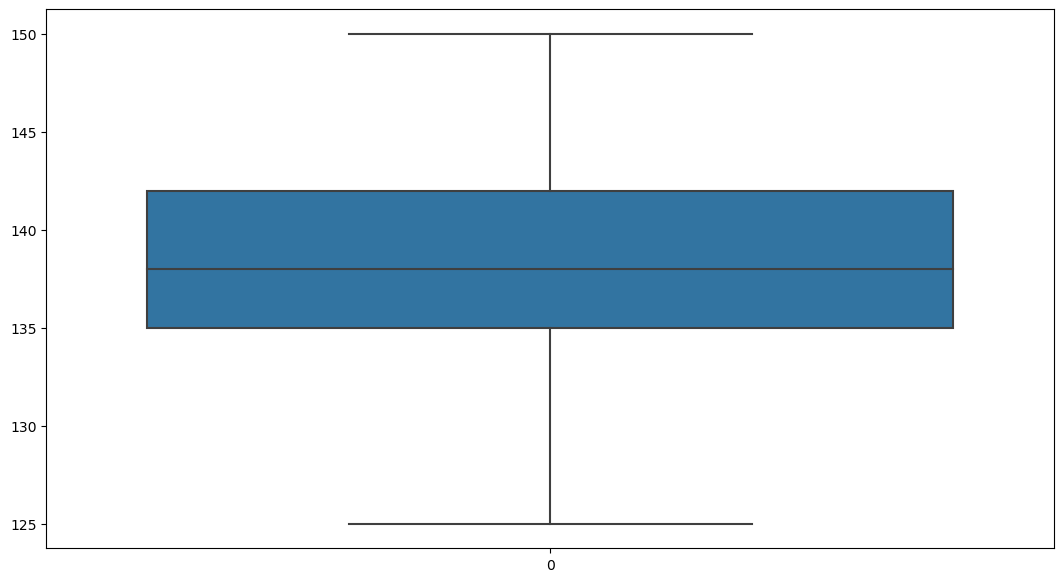

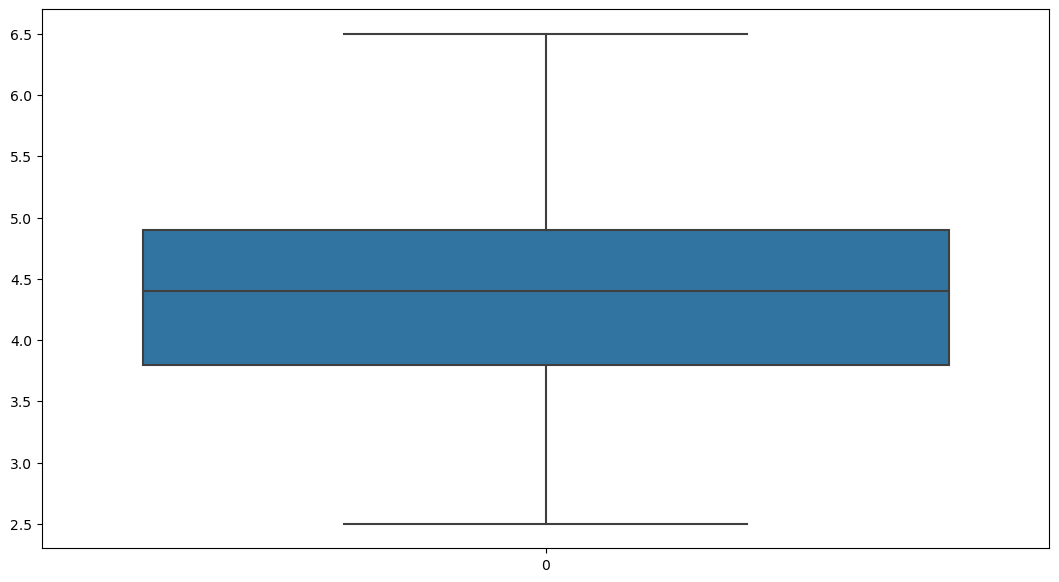

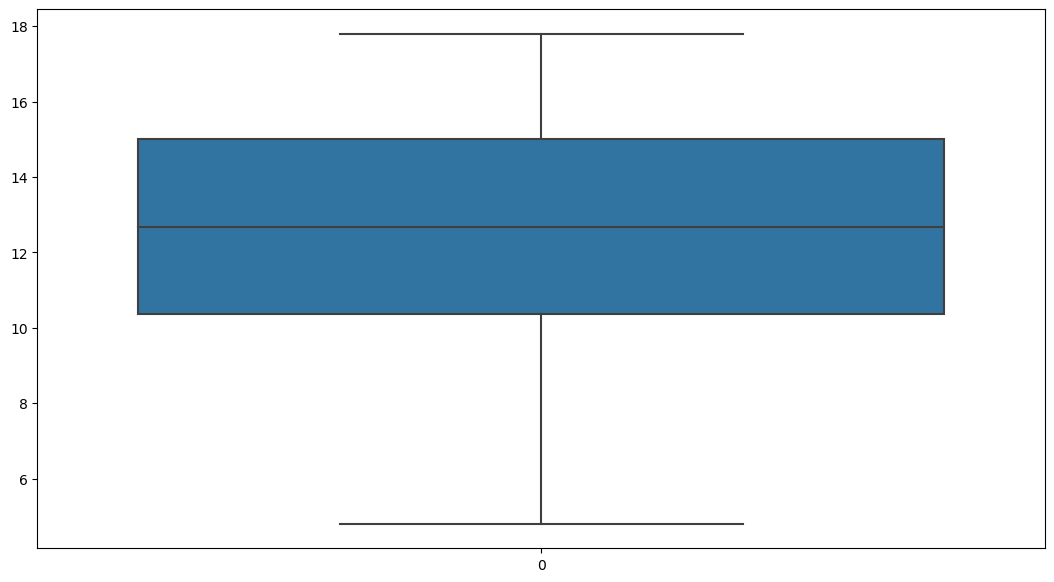

In [166]:
#checking the outliers once again with boxplot 

for col in num_cols:
  fig= plt.subplots(1,1, figsize = (13,7))
  sns.boxplot(data[col])

In [167]:
##target column

In [168]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [169]:
##rectifying the target column

In [170]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [171]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'pus_cell_clumps', 'hypertension', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'appetite', 'red_blood_cell_count', 'bacteria', 'anemia', 'white_blood_cell_count', 'packed_cell_volume', 'red_blood_cells', 'pedal_edema', 'pus_cell'}


In [172]:
from collections import Counter as c
for i in catcols:
    print("Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns : pus_cell_clumps
Counter({'not present': 354, 'present': 42, nan: 4})
************************************************************************************************************************

Columns : hypertension
Counter({'no': 251, 'yes': 147, nan: 2})
************************************************************************************************************************

Columns : class
Counter({'ckd': 250, 'notckd': 150})
************************************************************************************************************************

Columns : coronary_artery_disease
Counter({'no': 362, 'yes': 34, nan: 4})
************************************************************************************************************************

Columns : diabetesmellitus
Counter({'no': 258, 'yes': 134, nan: 8})
************************************************************************************************************************

Columns : appetite
Counter({'good': 317, 'poor': 82,

In [173]:
##removing the columns which are not categorical

In [174]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pus_cell_clumps', 'hypertension', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'appetite', 'bacteria', 'anemia', 'red_blood_cells', 'pedal_edema', 'pus_cell'}


In [175]:
##numerical columns

In [176]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'specific_gravity', 'sugar', 'albumin', 'blood glucose random', 'hemoglobin', 'blood_urea', 'sodium', 'potassium', 'serum_creatinine', 'blood_pressure', 'age'}


In [177]:
for i in contcols:
    print("Continous Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns : specific_gravity
Counter({1.02: 106, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

Continous Columns : sugar
Counter({0.0: 351, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

In [178]:
##removing the column which are not numerical

In [179]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood glucose random', 'hemoglobin', 'blood_urea', 'sodium', 'potassium', 'serum_creatinine', 'blood_pressure', 'age'}


In [180]:
###adding columns which we found continuous

In [181]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'red_blood_cell_count', 'blood glucose random', 'hemoglobin', 'blood_urea', 'sodium', 'white_blood_cell_count', 'potassium', 'serum_creatinine', 'packed_cell_volume', 'blood_pressure', 'age'}


In [182]:
###adding columns which we found categorical

In [183]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pus_cell_clumps', 'hypertension', 'class', 'specific_gravity', 'coronary_artery_disease', 'diabetesmellitus', 'appetite', 'albumin', 'sugar', 'bacteria', 'anemia', 'red_blood_cells', 'pedal_edema', 'pus_cell'}


In [184]:
###rectifying the categorical columns classes

In [185]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 362, 'yes': 34, nan: 4})

In [186]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 134, 'no': 258, nan: 8})

In [187]:
#Handling The Missing Values

In [188]:
##null values

In [189]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                     False
class                      False
dtype: bool

In [190]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetesmellitus             8
coronary_artery_disease      4
appetite                     1
pedal_edema                  1
anemia                       0
class                        0
dtype: int64

In [191]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')


In [192]:
#seperating independent variable

x=data.iloc[:,:-1]
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,not present,not present,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,55.0,80.0,1.020,4.0,0.0,NaN,normal,not present,not present,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,0.0,normal,normal,not present,not present,121.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,not present,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,not present,not present,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,not present,not present,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,not present,not present,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,not present,not present,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,not present,not present,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [193]:
#seperating dependent variable

y=data.iloc[:,-1]
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object

In [194]:
#Replacing The Missing Values

In [195]:
##handling continuous/numerical columns null values

In [196]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


In [197]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)


In [198]:
#Label Encoding

In [199]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

LABEL ENCODING OF: pus_cell_clumps
Counter({'not present': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
LABEL ENCODING OF: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: specific_gravity
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
********************************************************************

In [200]:
#Splitting The Dataset Into Dependent And Independent Variable

In [201]:
##creating independent and dependant

In [202]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [203]:
#Split The Dataset Into Train Set And Test Set

In [204]:
##splitting the data into train and test

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [206]:
##building a machine learning model

In [207]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [208]:
#fitting the model over training data
model.fit(x_train,y_train)

RandomForestClassifier()

In [209]:
RandomForestClassifier()

RandomForestClassifier()

In [210]:
y_pred=model.predict(x_test)

In [211]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [212]:
#importing metrics to check the performance of the model

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [213]:
#displaying accuracy score of testing data
accuracy_score(y_test,y_pred) #higher accuracy

0.9375

<AxesSubplot:>

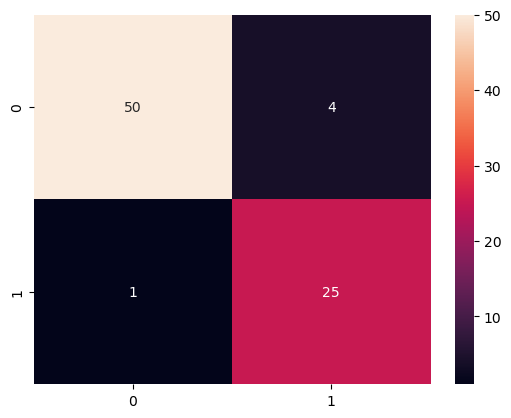

In [214]:
#confusion matrix display
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [215]:
#classification report displaying  the other performance metrics

print(classification_report(y_test,y_pred));

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.86      0.96      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [216]:
#3Tunning using cross validation

In [217]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [218]:
model.fit(x_train, y_train)
y_model = model.predict(x_test)

In [219]:
accuracy_score(y_test, y_model)

0.9375

In [220]:
#Regression model

In [221]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

Y = np.array([y_test])
Yhat = np.array([y_pred])
X = list(range(len(Y)))    

In [222]:
d = Y-Yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((Y-np.mean(Y))**2))

print("Results by manual alculations")
print("MAE:",mae_f)
print("MSE:",mse_f)
print("RMSE",rmse_f)
print("R-Squared:",r2_f)

Results by manual alculations
MAE: 0.451875
MSE: 0.451875
RMSE 0.6722164829874376
R-Squared: [[ 1.          1.          1.         ...  1.         -8.46745562
   1.        ]
 [ 1.          1.          1.         ...  1.         -8.46745562
   1.        ]
 [ 1.          1.          1.         ...  1.         -8.46745562
   1.        ]
 ...
 [ 1.          1.          1.         ...  1.         -8.46745562
   1.        ]
 [-1.19478738 -1.19478738 -1.19478738 ... -1.19478738  1.
  -1.19478738]
 [ 1.          1.          1.         ...  1.         -8.46745562
   1.        ]]


In [223]:
# 2nd model is based on Logistic Regression

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [224]:
model1.fit(x_train,y_train)

LogisticRegression()

In [225]:
#Test The Model

In [226]:
##predicting our output with the model which we build

In [227]:
LogisticRegression()

LogisticRegression()

In [228]:
y_pred1=model1.predict(x_test)

In [229]:
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [230]:
#Model Evaluation

In [231]:
accuracy_score(y_test,y_pred1)

0.9125

<AxesSubplot:>

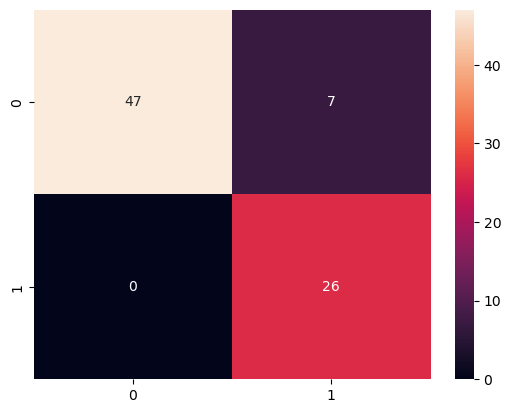

In [232]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

In [233]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        54
           1       0.79      1.00      0.88        26

    accuracy                           0.91        80
   macro avg       0.89      0.94      0.91        80
weighted avg       0.93      0.91      0.91        80



In [234]:
#3rd model based on Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [235]:
GaussianNB()

GaussianNB()

In [236]:
y_pred3=model2.predict(x_test) 
y_pred3

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [237]:
accuracy_score(y_test,y_pred3)

0.875

<AxesSubplot:>

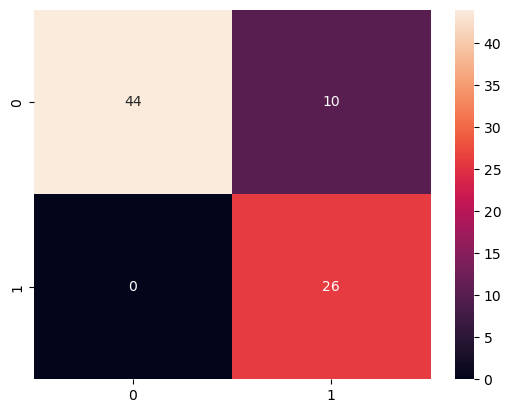

In [238]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)

In [239]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        54
           1       0.72      1.00      0.84        26

    accuracy                           0.88        80
   macro avg       0.86      0.91      0.87        80
weighted avg       0.91      0.88      0.88        80



In [240]:
#4th model based on Support vector machine 

from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)

SVC()

In [241]:
y_pred4=model3.predict(x_test) 
y_pred4

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [242]:
accuracy_score(y_test,y_pred4) #least accuracy

0.6875

<AxesSubplot:>

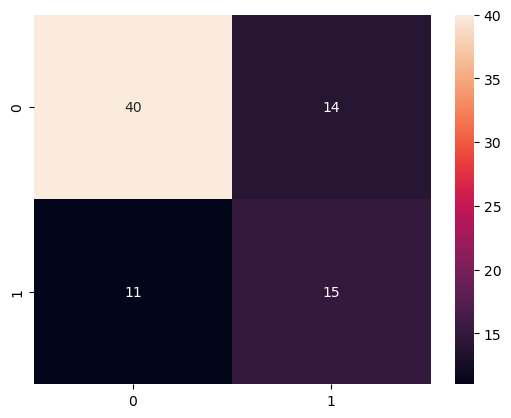

In [243]:
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True)

In [244]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        54
           1       0.52      0.58      0.55        26

    accuracy                           0.69        80
   macro avg       0.65      0.66      0.65        80
weighted avg       0.70      0.69      0.69        80



In [245]:
#5th model is based on Decision tree 

from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy')
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [246]:
y_pred5=model4.predict(x_test) 
y_pred5

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [247]:
accuracy_score(y_test,y_pred5) #has same high accuracy as Random Forest

0.8875

<AxesSubplot:>

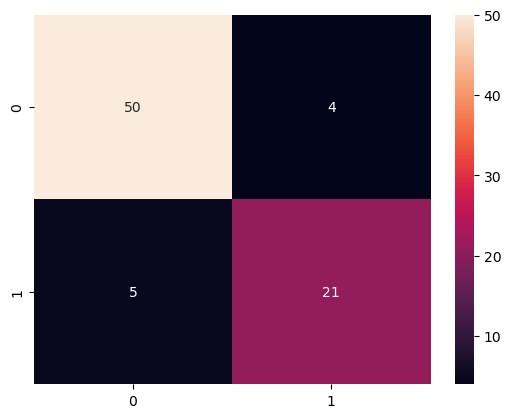

In [248]:
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True)

In [249]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.84      0.81      0.82        26

    accuracy                           0.89        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.89      0.89      0.89        80



In [250]:
#Save the model

In [251]:
import pickle
pickle.dump(model,open('CKD1.pkl','wb'))

In [252]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,55.0,80.0,3,4,0,1,1,0,0,126.792135,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,0,1,1,0,0,121.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    int64  
 3   albumin                  400 non-null    int64  
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood glucose random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [254]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,55.0,80.0,3,4,0,1,1,0,0,126.792135,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,0,1,1,0,0,121.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [255]:
data.red_blood_cells.value_counts()

1    353
0     47
Name: red_blood_cells, dtype: int64

In [256]:
data.pus_cell.value_counts()

1    324
0     76
Name: pus_cell, dtype: int64

In [257]:
data.coronary_artery_disease.value_counts()

0    366
1     34
Name: coronary_artery_disease, dtype: int64

In [258]:
data.anemia.value_counts()

0    340
1     60
Name: anemia, dtype: int64

In [259]:
data.diabetesmellitus.value_counts()

0    266
1    134
Name: diabetesmellitus, dtype: int64

In [260]:
data.pedal_edema.value_counts()

0    324
1     76
Name: pedal_edema, dtype: int64

In [261]:
data.blood_urea.value_counts()

42.000000     43
43.535958     19
46.000000     15
25.000000     13
19.000000     11
              ..
71.000000      1
50.100000      1
118.000000     1
88.000000      1
21.000000      1
Name: blood_urea, Length: 86, dtype: int64